# Laboratorio 1 - Regresión  

### Grupo 23
- **Estudiante 1** : Juan Sebastián Ardila López
- **Estudiante 2** : William Andrés Bayona Vergara
- **Estudiante 3** : Ana María Hernández Lasso

# Etapa 1. Entendimiento de los Datos
Describir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado.

## 1.1 Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo CSV.

In [90]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento
df_futbol = pd.read_csv('./datos_entrenamiento_laboratorio1(train_data).csv')
#Queremos conocer el número de filas y columnas
#Las filas corresponden a las características y métricas de cada jugador
#Las columnas corresponden a los registros
filas, columnas = df_futbol.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Mostramos las primeras filas de los jugadores para saber cómo son los datos
df_futbol


Cantidad de filas: 57934
Cantidad de columnas: 50


Jugador Nacionalidad Posicion    Edad  \
0         Bruno Fernandes       pt POR    FW,AM  29-343   
1         Marcus Rashford      eng ENG       LW  26-290   
2             Amad Diallo       ci CIV       RW  22-036   
3             Amad Diallo       ci CIV       RW  22-036   
4      Alejandro Garnacho       ar ARG       RW  20-046   
...                   ...          ...      ...     ...   
57929    Chiedozie Ogbene       ie IRL       RW  27-122   
57930       Conor Chaplin      eng ENG    AM,RW  27-197   
57931    Omari Hutchinson      eng ENG    AM,RW  20-306   
57932     Kalvin Phillips      eng ENG       DM  28-273   
57933        Jens Cajuste       se SWE       DM  25-021   

                    Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  ...  \
0        Friday August 16, 2024      0              6  1.2   1.2  0.0  ...   
1        Friday August 16, 2024      0              0  0.0   0.0  0.7  ...   
2        Friday August 16, 2024      0              0  0.0   0.0  0.1  ...   
3        Friday August 16, 2024     -5              0  0.0   0.0  0.1  ...   
4        Friday August 16, 2024      0              2  0.7   0.7  0.2  ...   
...                         ...    ...            ...  ...   ...  ...  ...   
57929  Saturday August 31, 2024      0              0  0.0   0.0  0.0  ...   
57930  Saturday August 31, 2024      0              0  0.0   0.0  0.0  ...   
57931  Saturday August 31, 2024      0              2  0.1   0.1  0.0  ...   
57932  Saturday August 31, 2024      0              0  0.0   0.0  0.0  ...   
57933  Saturday August 31, 2024      0              0  0.0   0.0  0.0  ...   

       Malos_controles  Perdida_balon  Pases_recibidos  \
0                    1              2               51   
1                    2              1               37   
2                    2              2               26   
3                    2              2               26   
4                    2              1               12   
...                ...            ...              ...   
57929                1              2               16   
57930                0              0                3   
57931                4              2               29   
57932                0              2               27   
57933                0              0                7   

       Pases_progresivos_recibidos  Faltas_cometidas  Centros  \
0                                7                 0        8   
1                                9                 1        1   
2                                7                 0        2   
3                                7                 0        2   
4                                3                 0        1   
...                            ...               ...      ...   
57929                            8                 2        2   
57930                            0                 0        0   
57931                            4                 1        1   
57932                            0                 2        3   
57933                            0                 0        0   

       Duelos_aereos_ganados  %_de_duelos_aereos_ganados  market_value  \
0                          0                         0.0       €50.00m   
1                          1                       100.0       €50.00m   
2                          0                         0.0             -   
3                          0                         0.0     €1000.00m   
4                          1                        50.0       €45.00m   
...                      ...                         ...           ...   
57929                      1                        50.0           NaN   
57930                      0                         NaN           NaN   
57931                      1                        50.0       €22.00m   
57932                      0                         NaN       €12.00m   
57933                      0                         0.0        €6.00m   

     

### Caracteristicas Generales

In [91]:
#Mostramos la información de las columnas del dataset
df_futbol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pases_intentados                

En el diccionario de datos se hace alusión a 41 columnas. Ahora veamos el por qué en el dataset son 50.

In [92]:
#Veamos el por qué hay varios xAG, ya que no se mencionan las columnas "xAG.1", "xAG.2", "xAG.3" en el diccionario de datos.
df_futbol[["xAG", "xAG.1", "xAG.2", "xAG.3"]]

#Aquí vemos que hay 3 columnas adicionales a las 41.

xAG  xAG.1  xAG.2  xAG.3
0      0.0    0.0    0.0    0.0
1      0.7    0.7    0.7    0.7
2      0.1    0.1    0.1    0.1
3      0.1    0.1    0.1    0.1
4      0.2    0.2    0.2    0.2
...    ...    ...    ...    ...
57929  0.0    0.0    0.0    0.0
57930  0.0    0.0    0.0    0.0
57931  0.0    0.0    0.0    0.0
57932  0.0    0.0    0.0    0.0
57933  0.0    0.0    0.0    0.0

[57934 rows x 4 columns]

In [93]:
#Veamos el por qué hay varios Regates_exitosos, ya que no se mencionan la columna "Regates_exitosos_1" en el diccionario de datos.
df_futbol[["Regates_exitosos", "Regates_exitosos.1"]]

#Aquí vemos que hay 1 columnas adicional a las 41.

Regates_exitosos  Regates_exitosos.1
0                     1                   1
1                     0                   0
2                     1                   1
3                     1                   1
4                     0                   0
...                 ...                 ...
57929                 0                   0
57930                 0                   0
57931                 2                   2
57932                 0                   0
57933                 1                   1

[57934 rows x 2 columns]

In [94]:
#Veamos el por qué hay varios Pases_progresivos, ya que no se mencionan la columna "Pases_progresivos.1" en el diccionario de datos.
df_futbol[["Pases_progresivos", "Pases_progresivos.1"]]

#Aquí vemos que hay 1 columna adicional a las 41.

Pases_progresivos  Pases_progresivos.1
0                      6                    6
1                      2                    2
2                      1                    1
3                      1                    1
4                      0                    0
...                  ...                  ...
57929                  0                    0
57930                  1                    1
57931                  3                    3
57932                  3                    3
57933                  1                    1

[57934 rows x 2 columns]

In [95]:
#Veamos el por qué hay varios Pases_completados, ya que no se menciona las columnas "Pases_completados.1", "Pases_completados.2" en el diccionario de datos.
df_futbol[["Pases_completados", "Pases_completados.1", "Pases_completados.2"]]

#Aquí vemos que hay 2 columnas adicionales a las 41.

Pases_completados  Pases_completados.1  Pases_completados.2
0                     43                   43                   43
1                     22                   22                   22
2                     28                   28                   28
3                     28                   28                   28
4                     10                   10                   10
...                  ...                  ...                  ...
57929                 12                   12                   12
57930                  4                    4                    4
57931                 29                   29                   29
57932                 27                   27                   27
57933                  8                    8                    8

[57934 rows x 3 columns]

In [96]:
#Veamos el por qué hay varios Pases_intentados, ya que no se menciona las columnas "Pases_intentados.1", "Pases_intentados.2" en el diccionario de datos.
df_futbol[["Pases_intentados", "Pases_intentados.1", "Pases_intentados.2"]]

#Aquí vemos que hay 2 columnas adicionales a las 41.

Pases_intentados  Pases_intentados.1  Pases_intentados.2
0                    60                  60                  60
1                    30                  30                  30
2                    33                  33                  33
3                    33                  33                  33
4                    11                  11                  11
...                 ...                 ...                 ...
57929                16                  16                  16
57930                 4                   4                   4
57931                32                  32                  32
57932                35                  35                  35
57933                 9                   9                   9

[57934 rows x 3 columns]

### Tipos de Datos

In [97]:
#Según el tipo de dato podemos saber cuáles podrían llegar ser variables categóricas o numéricas, o si hay algo extraño

#Traemos las columnas de tipo object, que suelen ser texto
lista_variables_texto = df_futbol.select_dtypes(include=['object']).columns

#Traemos las columnas de tipo int64, float64
lista_variables_numero = df_futbol.select_dtypes(include=['float64', 'int64']).columns

#Ahora podemos conocerlas mejor
print(lista_variables_texto)
print("-------------")
print(lista_variables_numero)
print("-------------")
print("Cantidad de variables de texto:", len(lista_variables_texto))
print("Cantidad de variables de número:", len(lista_variables_numero))

Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido',
       'market_value', 'contract_date'],
      dtype='object')
-------------
Index(['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1',
       'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1',
       'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1',
       'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados',
       'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_recibidos', 'Pases_progr

### Consideraciones sobre los datos

Por ahora, como estamos en la etapa de entendimiento de los datos, dejaremos anotadas las observaciones a las que hemos llegado:

1.  La variable `Edad` está como texto (`object`), pero debería ser trabajada como una variable numérica.  
2. La variable `market_value` también está como texto (`object`), pero debería ser trabajada como una variable numérica. En el diccionario de datos se indica que esta métrica corresponde al valor estimado de mercado del jugador en euros.
3. `contract_date` y `Dia_partido` aparecen como texto, pero en realidad podrían también ser fechas (datetime), y de hecho `contract_date` debería serlo según el diccionario de datos.  
4. Hay columnas cuyo nombre termina en .1, .2, .3. Por ejemplo, la columna `Pases_intentados.1`. Este tipo de columnas son nueve en total, y ninguna de ellas se mencionan en el diccionario de datos. Tampoco brindan información nueva, de hecho toda la información dada es la repetición de la columna original (que si aparece en el diccionario de datos).
5. Hay muchas posiciones diferentes de fútbol en `Posicion`, sería útil darlas en un mismo formato, como el mencionado en el diccionario de datos (Defensa, Delantero, Portero, ...). Además, hay algunos jugadores con más de una posición, siendo una columna multivalor.
6. En la columna `Edad` podemos considerar el número antes del guion (-) presente en los datos.
7. La columna `nacionalidad` tiene el prefijo del país y luego la abreviatura del país. Es de utilidad revisarlo.


Debemos mencionar que estos ajustes no se realizarán en esta etapa, sino en la etapa 2 del Método ASUM-DM: **Preparación de datos.**

### Estadisticas Descriptivas

In [98]:
#Ahora revisaremos las estadísticas descriptivas de variables numéricas

# Calcular estadísticas descriptivas
estadisticas_variables_numero = df_futbol[lista_variables_numero].describe().T

# Agregar mediana
estadisticas_variables_numero['median'] = df_futbol[lista_variables_numero].median()

estadisticas_variables_numero

count       mean        std  min   25%  \
Goles                           57934.0   0.513015  16.440600 -5.0   0.0   
Tiros Totales                   57934.0   0.792402   1.158538  0.0   0.0   
xG                              57934.0   0.088635   0.209810  0.0   0.0   
npxG                            57934.0   0.080473   0.186549  0.0   0.0   
xAG                             57934.0   0.062784   0.152033  0.0   0.0   
xAG.1                           57934.0   0.062784   0.152033  0.0   0.0   
Acciones_que_crean_tiros        57934.0   1.416750   1.727395  0.0   0.0   
Pases_intentados                57934.0  31.659716  22.963272  0.0  13.0   
Pases_intentados.1              57934.0  31.659716  22.963272  0.0  13.0   
Pases_intentados.2              57934.0  31.659716  22.963272  0.0  13.0   
Pases_progresivos               57934.0   2.416232   2.756341  0.0   0.0   
Pases_progresivos.1             57934.0   2.416232   2.756341  0.0   0.0   
Regates_exitosos                57934.0   0.487451   0.897683  0.0   0.0   
Regates_exitosos.1              57934.0   0.487451   0.897683  0.0   0.0   
Pases_medios_completados        57934.0  11.226309  10.984869  0.0   3.0   
Pases_largos_completados        57934.0   2.341941   2.867533  0.0   0.0   
xAG.2                           57934.0   0.062784   0.152033  0.0   0.0   
xAG.3                           57934.0   0.062784   0.152033  0.0   0.0   
xA                              57934.0   0.055056   0.122355  0.0   0.0   
Pases_en_ultimo_tercio          57934.0   1.976232   2.583320  0.0   0.0   
Pases_balon_vivo                57934.0  28.593900  21.511297  0.0  12.0   
Pases_balon_muerto              57934.0   2.956140   3.733981  0.0   0.0   
Pases_al_hueco                  57934.0   0.096196   0.342576  0.0   0.0   
Pases_centros                   57934.0   1.133652   2.005869  0.0   0.0   
Pases_completados               57934.0  25.745624  20.703206  0.0   9.0   
Pases_completados.1             57934.0  25.745624  20.703206  0.0   9.0   
Pases_completados.2             57934.0  25.745624  20.703206  0.0   9.0   
Pases_fuera_de_juego            57934.0   0.109677   0.345491  0.0   0.0   
Valla_no_vencida                57934.0   1.502727   2.169317  0.0   0.0   
Errores_defnsivos_ocasion_tiro  57934.0   0.041513   0.207865  0.0   0.0   
Toques_en_zona_ofensiva         57934.0   9.201091   9.322087  0.0   2.0   
Toques_en_area_rival            57934.0   1.410950   1.957006  0.0   0.0   
%_de_regates_exitosos           29212.0  43.171587  40.232967  0.0   0.0   
Veces_que_fue_barrido_regate    57934.0   0.534522   0.934409  0.0   0.0   
Acarreos_ultimo_tercio          57934.0   0.801809   1.210875  0.0   0.0   
Malos_controles                 57934.0   0.950133   1.221368  0.0   0.0   
Perdida_balon                   57934.0   0.574033   0.931852  0.0   0.0   
Pases_recibidos                 57934.0  25.518383  19.001270  0.0  11.0   
Pases_progresivos_recibidos     57934.0   2.382470   3.158174  0.0   0.0   
Faltas_cometidas                57934.0   0.781337   1.005105  0.0   0.0   
Centros                         57934.0   1.133652   2.005869  0.0   0.0   
Duelos_aereos_ganados           57934.0   0.834795   1.305149  0.0   0.0   
%_de_duelos_aereos_ganados      36977.0  48.814187  39.560765  0.0   0.0   

                                 50%    75%    max  median  
Goles                            0.0    0.0  995.0     0.0  
Tiros Totales                    0.0    1.0   12.0     0.0  
xG                               0.0    0.1    2.9     0.0  
npxG                             0.0    0.1    2.9     0.0  
xAG                              0.0    0.1    2.1     0.0  
xAG.1                            0.0    0.1    2.1     0.0  
Acciones_que_crean_tiros         1.0    2.0   16.0     1.0  
Pases_intentados                28.0   45.0  171.0    28.0  
Pases_intentados.1              28.0   45.0  171.0    28.0  
Pases_intentados.2              28.0   45.0  171.0    28.0  
Pases_progresivos 

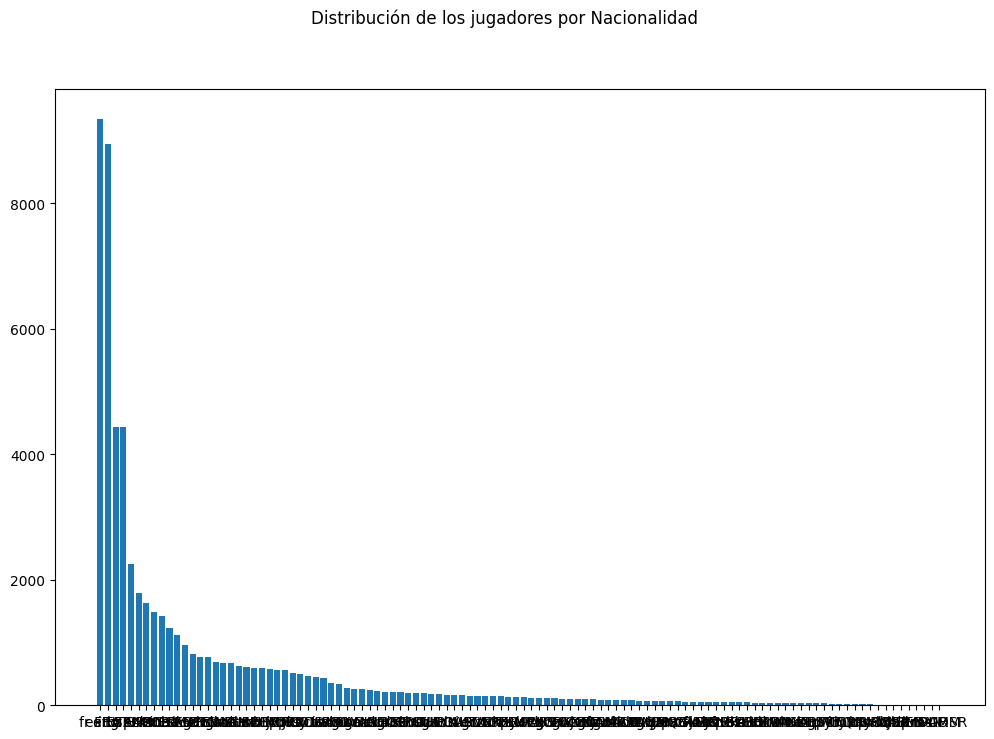

In [99]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset

#Empecemos con un grafico de barras para las nacionalidades más frecuentes y menos frecuentes
import matplotlib.pyplot as plt

todas_nacionalidades = df_futbol['Nacionalidad'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.bar(todas_nacionalidades.index, todas_nacionalidades.values)

fig.suptitle("Distribución de los jugadores por Nacionalidad")

plt.show()

Son muchas nacionalidades, no se lee nada, así que hacemos tops para entender mejor

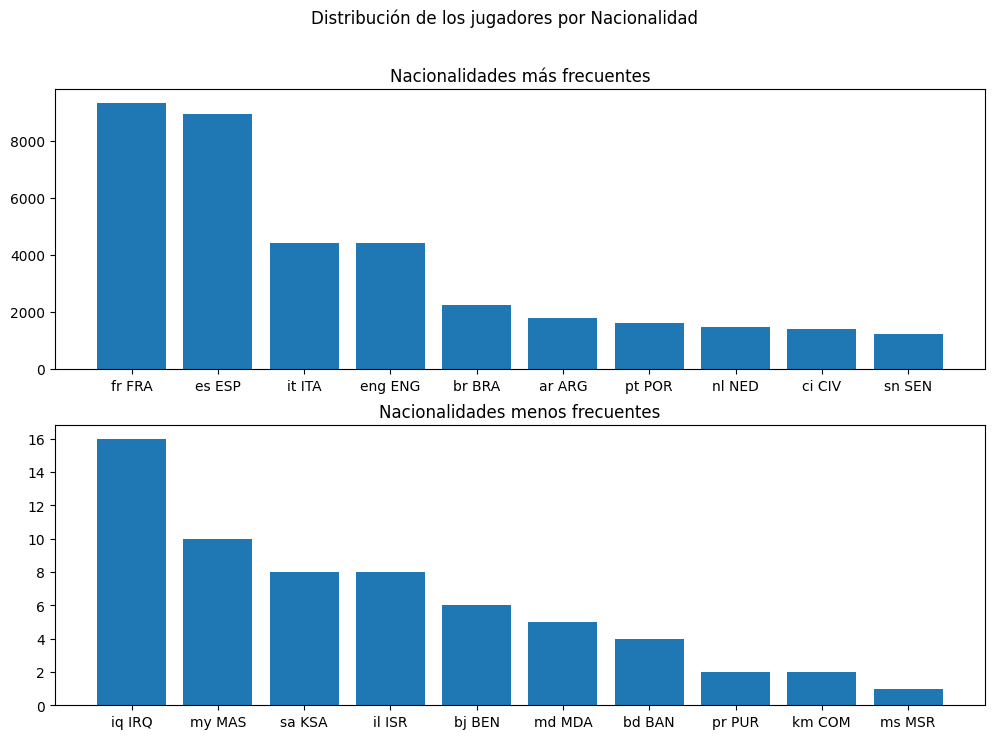

In [100]:

#Top 10 nacionalidades más frecuentes
top_nacionalidades = df_futbol['Nacionalidad'].value_counts().head(10)
#Top 10 nacionalidades menos frecuentes
pocas_nacionalidades = df_futbol['Nacionalidad'].value_counts().tail(10)

#Creamos la figura
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

#Graficamos las nacionalidades más frecuentes
ax[0].bar(top_nacionalidades.index, top_nacionalidades.values) #El indice nos da la nacionalidad y values nos da la frecuencia
ax[0].set_title('Nacionalidades más frecuentes')

ax[1].bar(pocas_nacionalidades.index, pocas_nacionalidades.values)
ax[1].set_title('Nacionalidades menos frecuentes')

fig.suptitle("Distribución de los jugadores por Nacionalidad")

plt.show()

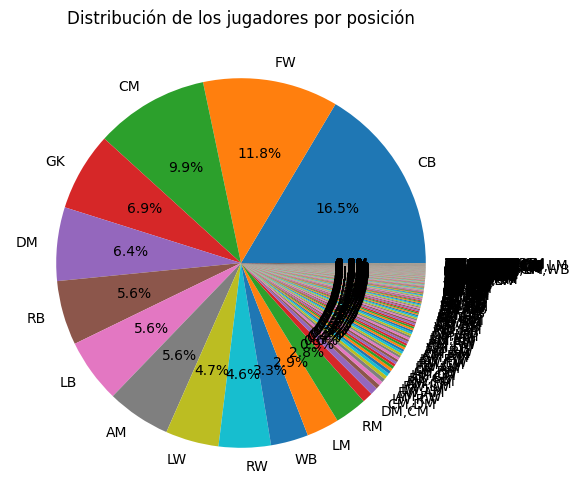

In [101]:
#Ahora visualizaremos la distribución de las posiciones de futbol mediante un pie chart

posiciones = df_futbol['Posicion'].value_counts()

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(posiciones, labels=posiciones.index, autopct='%1.1f%%')
ax.set_title("Distribución de los jugadores por posición")
plt.show()

Ahora mismo es posible revisar algunos de los distintos tipos de posiciones actuales:

In [102]:
#Se revisan los diferentes valores de la columna Posición
df_futbol['Posicion'].value_counts().reset_index()

Posicion  count
0          CB   9537
1          FW   6858
2          CM   5763
3          GK   3987
4          DM   3729
..        ...    ...
447  CM,DM,LW      1
448  WB,LB,LM      1
449  LW,WB,LM      1
450  FW,WB,RM      1
451  CM,LB,WB      1

[452 rows x 2 columns]

Así podemos ver que hay muchas posiciones diferentes, aunque las posiciones generales de fútbol reales no son tantas. Esta casilla es multivalor y además no hay categorías generales. Podemos dejar eso en stand-by mientras llegamos a la etapa de Preparación de Datos.

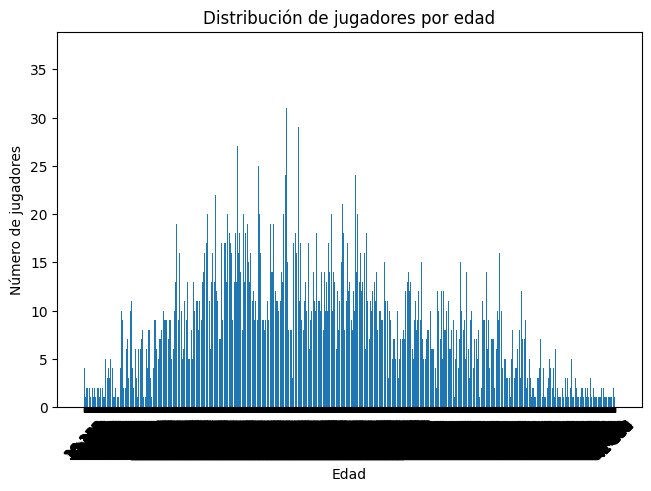

In [103]:
#Continuemos un grafico de barras para las edad


conteo_de_edades = df_futbol['Edad'].value_counts().sort_index() #Hagamoslo ordenado para no perdernos
plt.figure(layout='constrained')
plt.bar(conteo_de_edades.index, conteo_de_edades.values)
plt.title("Distribución de jugadores por edad")
plt.xlabel("Edad")
plt.ylabel("Número de jugadores")
plt.xticks(rotation=45)
plt.show()


Vemos que hay muchas edades, ya que siempre viene la edad escrita y luego un guion (-) con otra información. Podemos graficarlo más adelante únicamente con la edad que está antes del guion -. También lo dejaremos en stand-by mientras llegamos a la etapa de Preparación de datos.

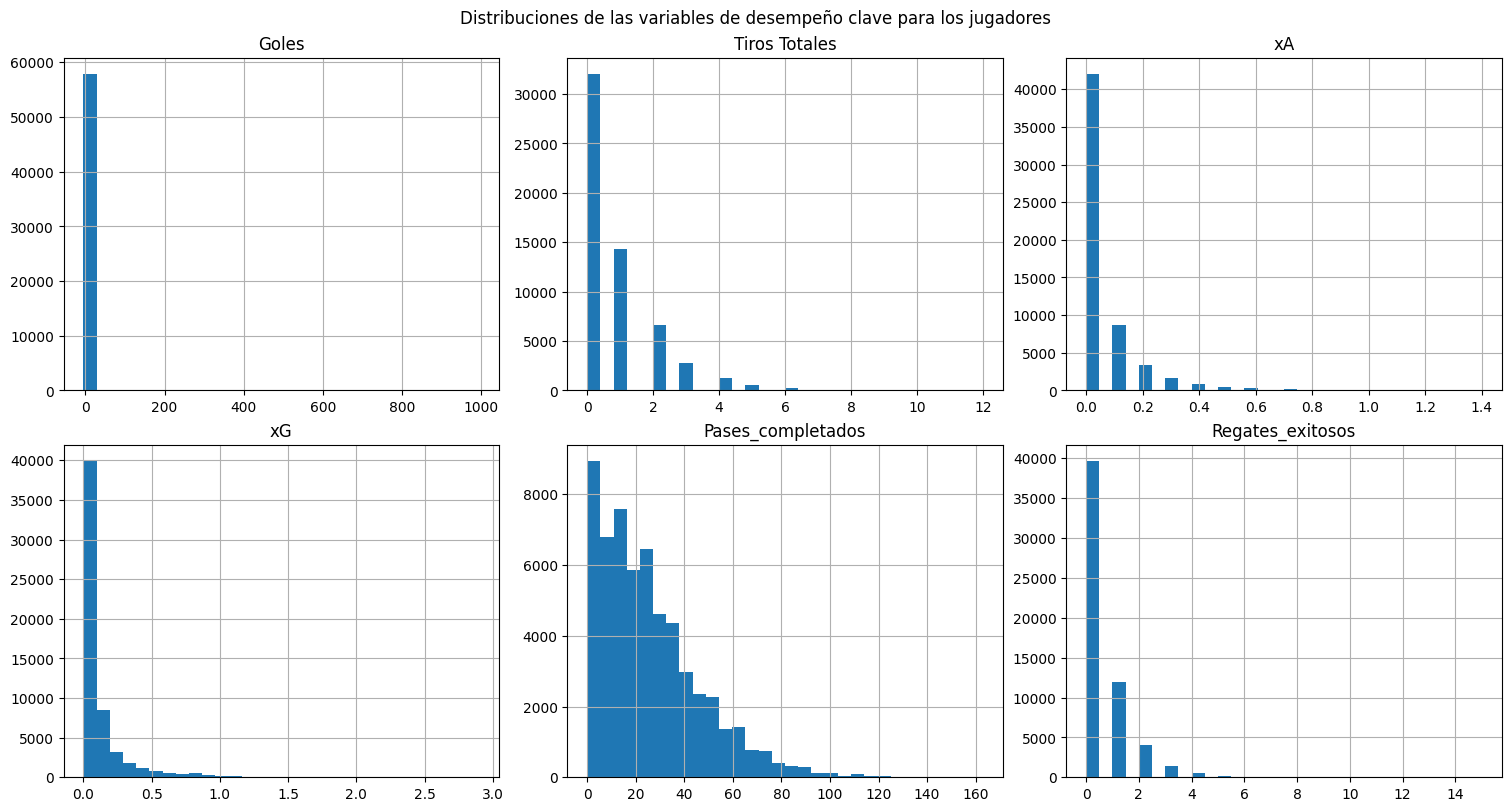

In [104]:
#Veamos ahora cómo son las distribuciones de las variables de desempeño clave para los jugadores

variables_clave = ['Goles', 'Tiros Totales', 'xA','xG', 'Pases_completados', 'Regates_exitosos']

#Cramos la figura
fig, ax = plt.subplots(2, 3, figsize=(15, 8), layout='constrained')

#Recorremos las variables clave para graficar
contador = 0
for i in range(0,2):
  for j in range(0,3):
    ax[i][j].hist( df_futbol[variables_clave[contador]], bins=30)
    ax[i][j].set_title(variables_clave[contador])
    ax[i][j].grid(True)
    contador += 1


fig.suptitle("Distribuciones de las variables de desempeño clave para los jugadores")

plt.show()

Podemos realizar un boxplot para aquellar variables del dataset con alta desviación estándar

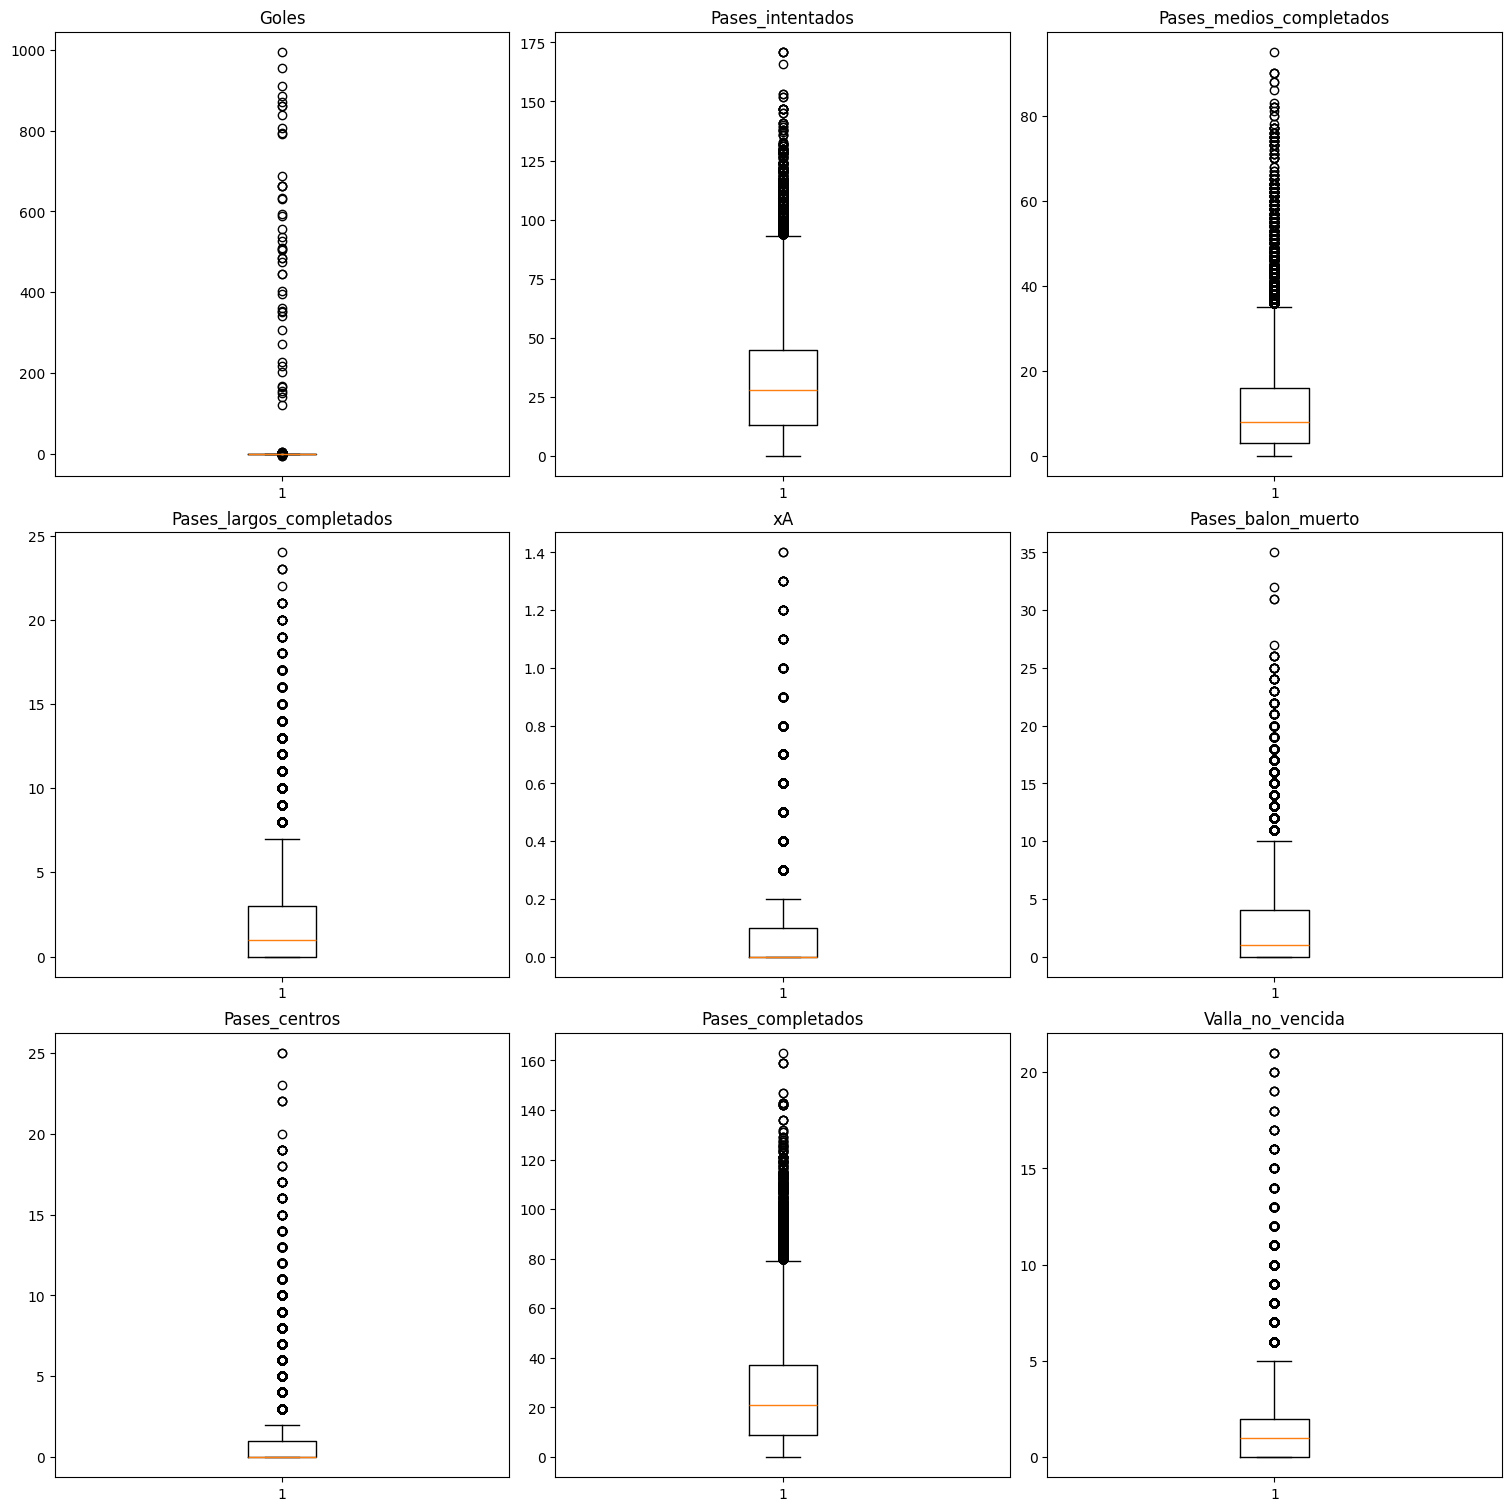

In [105]:
variables_clave = ['Goles', 'Pases_intentados', 'Pases_medios_completados', 'Pases_largos_completados', 'xA', 'Pases_balon_muerto', 'Pases_centros', 'Pases_completados', 'Valla_no_vencida']

#Creamos la figura
fig, ax = plt.subplots(3, 3 , figsize=(15, 15), layout='constrained')

#Recorremos las variables clave para graficar
contador = 0
for i in range(0,3):
  for j in range(0,3):
    ax[i][j].boxplot(df_futbol[variables_clave[contador]])
    ax[i][j].set_title(variables_clave[contador])
    contador += 1

plt.show()

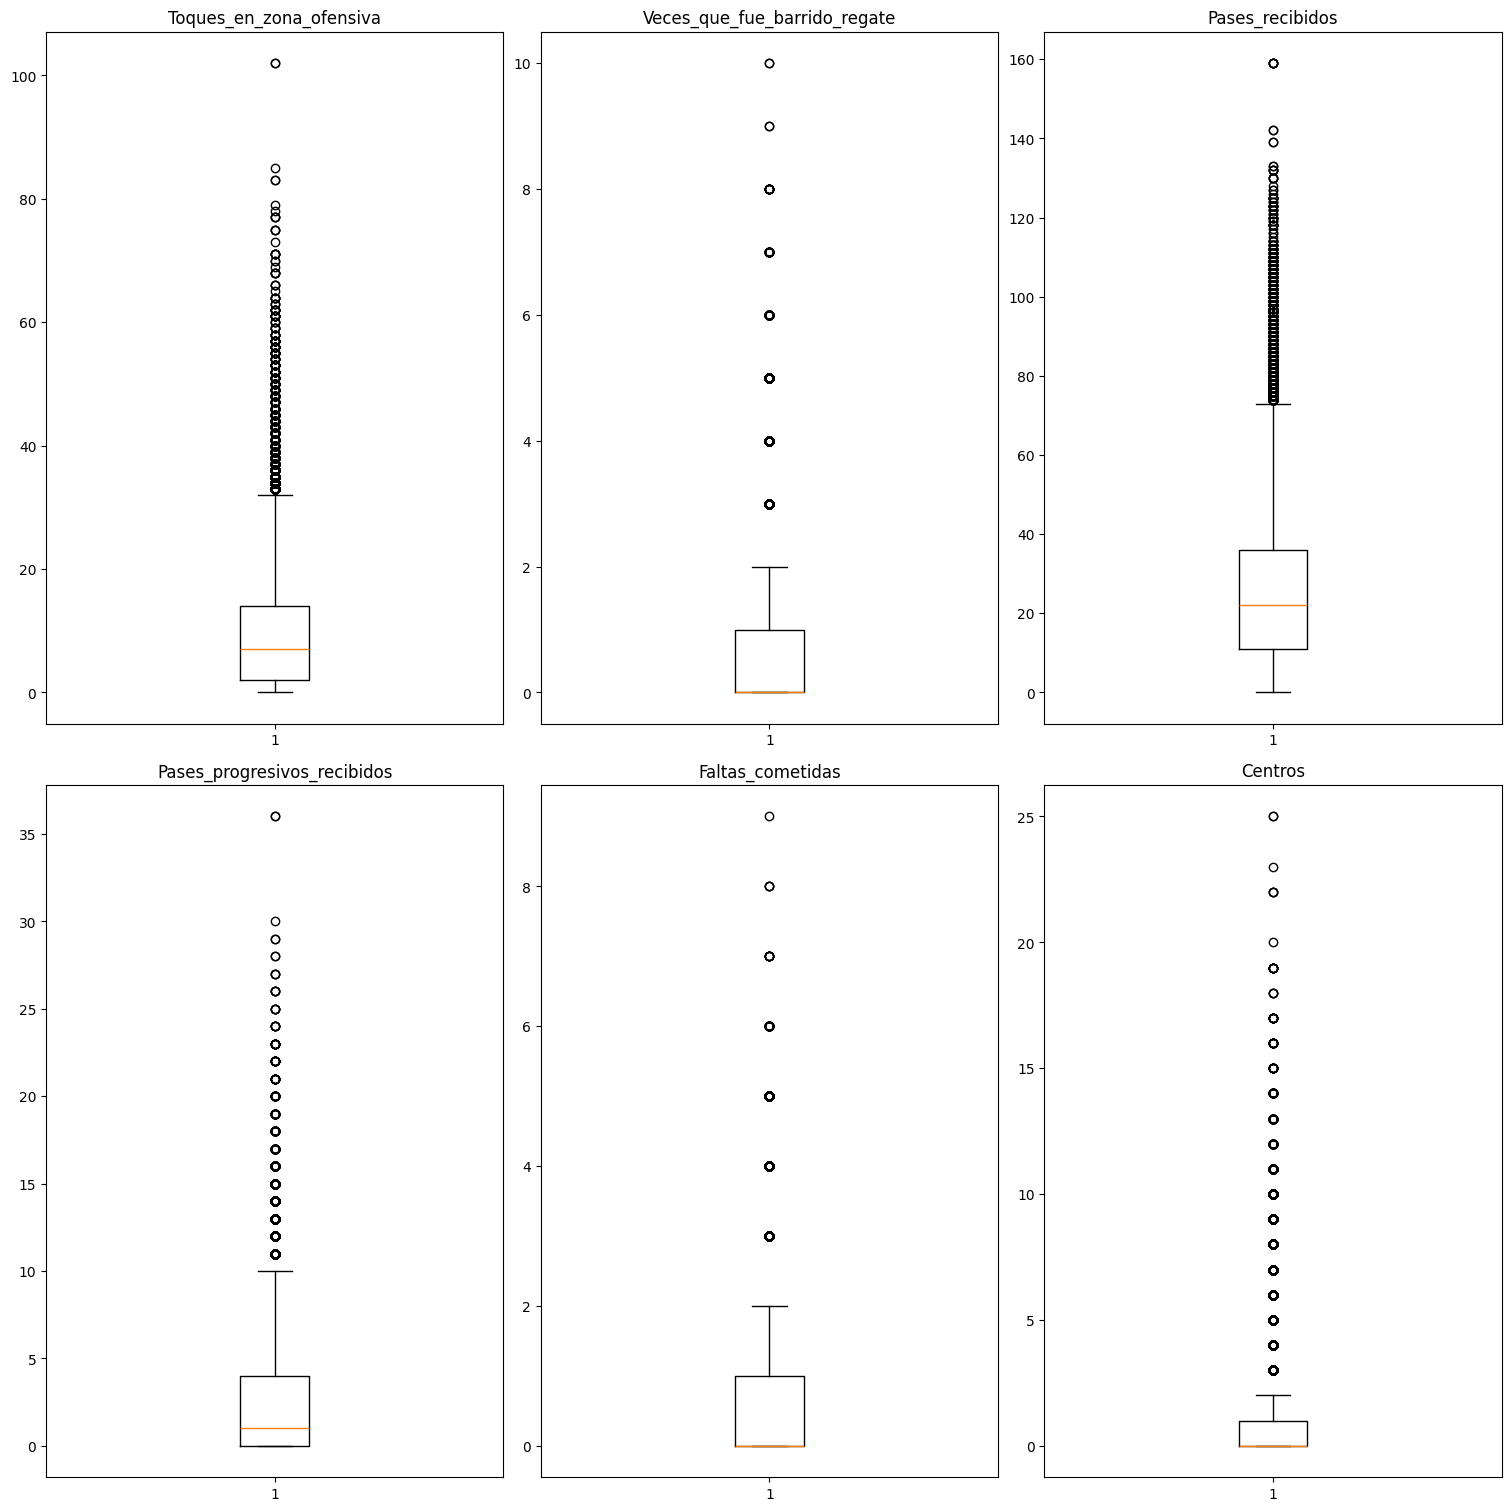

In [106]:
variables_clave = ['Toques_en_zona_ofensiva', 'Veces_que_fue_barrido_regate', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas',
                   'Centros']

#Creamos la figura
fig, ax = plt.subplots(2, 3, figsize=(15, 15), layout='constrained')

#Recorremos las variables clave para graficar
contador = 0
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].boxplot(df_futbol[variables_clave[contador]].dropna())
        ax[i][j].set_title(variables_clave[contador])
        contador += 1

plt.show()


## Descripción del entendimiento de datos
Nos compartieron un dataset de entrenamiento con la información del rendimiento de 57934 jugadores en un partido específico. Inicialmente, se identificaron 43 posibles variables numéricas y 7 posibles variables categóricas. Con el ajuste de las columnas `Edad` y `market_value` de texto a número, pues son variables numéricas; así como obviando las nueve columnas adicionales que no están en el diccionario de datos (las cuales terminan en sufijos como .1, .2, .3), tenemos 36 variables numéricas y 5 categóricas. En total, tenemos 41 columnas.

De esas columnas, podemos llegar a la siguiente información:

1. Generalidades del jugador: Compuesto por siete columnas, incluyendo Jugador (su nombre), edad, nacionalidad, posición, contract_date, market_value, dia partido (día en que se disputó el partido).

2. Métricas avanzadas de rendimiento: Compuesto por cinco columnas, incluyendo xG, npxG, xA, xAG y PSxG

3. Rendimiento tradicional del jugador: Compuesto por veintinueve columnas, incluyendo goles, tipos de pases, centros, duelos ganados, tiros, regates, acarreos, controles, pérdidas del balón, toques, faltas, errores y vallas

Ahora bien, gracias a las visualizaciones realizadas, entendemos que:

### Interpretación de visualización de variables categóricas:
En general, hay una gran cantidad de jugadores de Francia y España, seguidos por Italia e Inglaterra. Esto muestra que la mayoría de jugadores son europeos.


### Interpretación de visualización de variables numéricas:
- Podemos visualizar que la mayoría de variables de desempeño claves tienen distribuciones similares, en las cuales la mayoría de los jugadores tienen valores de cero o cercanos a cero. Esto quiere decir que unos pocos anotan goles, realizan regates o tienen un alto xG.

- La mayoría de métricas presentan distribuciones con muchos valores bajos y pocos valores muy altos, lo cual es esperable para un partido de fútbol. Esto es visible en los diagramas boxplot.

- Gráficamente, en el boxplot de la variable Goles se identifican valores irreales, ya que hay outliers cercanos o superiores a 200, así como valores negativos, los cuales no tienen sentido en el contexto de un solo partido.

### Interpretación de estadísticas descriptivas:
Finalmente, teniendo en cuenta las reglas de negocio, y una vez hemos comprendido las estadísticas descriptivas de las variables numéricas, también podemos afirmar:

1. Variables como Tiros Totales, xG, npxG, regates exitosos y duelos aéreos ganados presentan medianas y cuartiles (25%, 50%, 75%) iguales a 0. Esto nos muestra que en la mayoría de los registros que tenemos de los jugadores, sabemos que ellos no realizaron estas acciones durante el partido.

2. Algunas variables como los pases presentan una desviación estándar alta en comparación con su media. Por ejemplo, los pases intentados tienen una media de 31.65 y una desviación estándar de 22.96. Esto nos puede indicar que hay jugadores con un número de pases muy alto, mientras otros con un número de pases muy bajo. No todos intervienen en el partido de forma similar en cuanto a sus pases intentados. Esta tendencia suele verse con los diferentes tipos de pases.

### Identificación de reglas de negocio relevantes:

1. El número de goles no debería ser negativo.
2. El número máximo de métricas como goles, pases intentados, pases de balón vivo, pases completados, pases recibidos y centros no debería ser un valor irreal o exagerado.  



## 1.2 Análisis de calidad de los datos




### Completitud: revisar valores nulos

%_de_regates_exitosos             28722
%_de_duelos_aereos_ganados        20957
contract_date                     12916
market_value                      12894
Edad                                 48
Nacionalidad                         32
Jugador                               0
Posicion                              0
Dia_partido                           0
Goles                                 0
xAG.1                                 0
Acciones_que_crean_tiros              0
Pases_intentados                      0
Pases_intentados.1                    0
Tiros Totales                         0
xG                                    0
npxG                                  0
xAG                                   0
Regates_exitosos                      0
Pases_progresivos.1                   0
Pases_progresivos                     0
Pases_intentados.2                    0
Regates_exitosos.1                    0
Pases_medios_completados              0
Pases_largos_completados              0


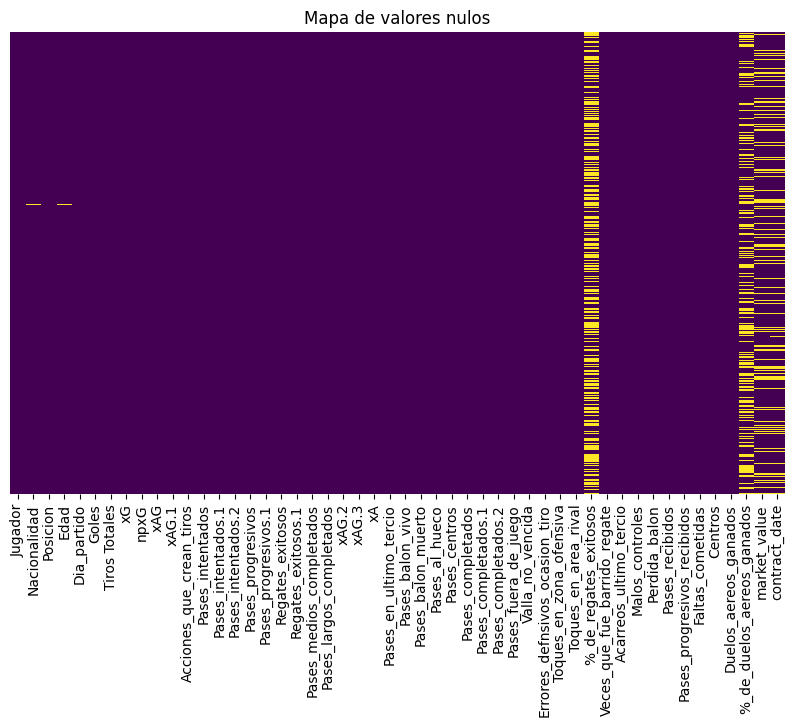

In [107]:
import seaborn as sns

#Veamos cuantos nulos hay en cada casilla
nulos = df_futbol.isnull().sum()
#Ordenamos los nulos de mayor a menor
nulos = nulos.sort_values(ascending=False)
display(nulos)

#Hacemos el mapa de valores nulos
#Los valores nulos se encuentran en amarillo.
plt.figure(figsize=(10, 6))
sns.heatmap(df_futbol.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()


Las variables con valores nulos son `%_de_regates_exitosos` (28.722 nulos), `%_de_duelos_aereos_ganados` (20.957 nulos), `contract_date` (12.916 nulos), `market_value` (12.894 nulos), `Edad` (48 nulos) y `Nacionalidad` (32 nulos). El resto de las variables no presenta nulos.

### Unicidad: revisar filas duplicadas completas y duplicados parciales


In [108]:
#Revisamos las filas duplicadas completas
num_duplicados = df_futbol.duplicated().sum()
print("Número de filas duplicadas completas:", num_duplicados)

#Revisamos las filas duplicadas parciales por Jugador, Posición y Día del partido
variables_para_duplicados = ['Jugador', 'Posicion', 'Dia_partido']

#Si deberia ser segun esos parametros??

duplicados_parciales = df_futbol.duplicated(subset=variables_para_duplicados, keep=False)
num_duplicados_parciales = duplicados_parciales.sum()
print("Número de duplicados parciales (según Jugador, Posicion y Dia Partido):", num_duplicados_parciales)

# Mostrar algunos ejemplos
print("Ejemplos de duplicados parciales:")
display(df_futbol[duplicados_parciales].head(10))

Número de filas duplicadas completas: 10483
Número de duplicados parciales (según Jugador, Posicion y Dia Partido): 25265
Ejemplos de duplicados parciales:


Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   
5         Mason Mount      eng ENG       AM  25-219  Friday August 16, 2024   
6      Joshua Zirkzee       nl NED       FW  23-086  Friday August 16, 2024   
7       Kobbie Mainoo      eng ENG       DM  19-119  Friday August 16, 2024   
8     Scott McTominay      sct SCO       DM  27-252  Friday August 16, 2024   
9            Casemiro       br BRA       DM  32-175  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  ...  Malos_controles  Perdida_balon  \
0      0              6  1.2   1.2  0.0  ...                1              2   
1      0              0  0.0   0.0  0.7  ...                2              1   
2      0              0  0.0   0.0  0.1  ...                2              2   
3     -5              0  0.0   0.0  0.1  ...                2              2   
4      0              2  0.7   0.7  0.2  ...                2              1   
5      0              1  0.3   0.3  0.1  ...                1              3   
6      1              1  0.1   0.1  0.0  ...                1              0   
7      0              1  0.0   0.0  0.0  ...                1              4   
8      0              0  0.0   0.0  0.0  ...                0              0   
9      0              3  0.2   0.2  1.0  ...                0              0   

   Pases_recibidos  Pases_progresivos_recibidos  Faltas_cometidas  Centros  \
0               51                            7                 0        8   
1               37                            9                 1        1   
2               26                            7                 0        2   
3               26                            7                 0        2   
4               12                            3                 0        1   
5               18                            3                 1        0   
6                6                            1                 0        0   
7               36                            1                 3        0   
8                2                            0                 0        0   
9               50                            0                 1        3   

   Duelos_aereos_ganados  %_de_duelos_aereos_ganados  market_value  \
0                      0                         0.0       €50.00m   
1                      1                       100.0       €50.00m   
2                      0                         0.0             -   
3                      0                         0.0     €1000.00m   
4                      1                        50.0       €45.00m   
5                      1                       100.0       €28.00m   
6                      0                         NaN       €30.00m   
7                      2                        40.0       €50.00m   
8                      1                       100.0       €50.00m   
9                      2                        50.0       €10.00m   

   contract_date  
0     30.06.2027  
1     30.06.2026  
2     30.06.2027  
3     30.06.2030  
4     30.06.2028  
5     30.06.2028  
6     30.06.2029  
7     30.06.2027  
8     30.06.2028  
9     30.06.2026  

[10 rows x 50 columns]

### Consistencia: Revisar los formatos de los datos y si los datos se contradicen o no entre sí (si hay incoherencias entre ellos)


In [109]:

#Los pases que fueron completados no deberian ser mayores que los pases intentados
inconsistencia_de_pases = df_futbol[df_futbol['Pases_completados'] > df_futbol['Pases_intentados']]

#Los goles no deberian ser mayores que los tiros
inconsistencia_de_goles = df_futbol[df_futbol['Goles'] > df_futbol['Tiros Totales']]

#El porcentaje de regates exitosos puede ser mayor a cero solo si en efeco hubo regates existosos
if '%_de_regates_exitosos' in df_futbol.columns:
    inconsistencia_de_regates = df_futbol[(df_futbol['%_de_regates_exitosos'] > 0) & (df_futbol['Regates_exitosos'] == 0)]


#El porcentaje de duelos aéreos puede ser mayor a cero solo si en efecto hubo duelos aereos ganados
if '%_de_duelos_aereos_ganados' in df_futbol.columns:
    inconsistencia__de_duelos = df_futbol[(df_futbol['%_de_duelos_aereos_ganados'] > 0) & (df_futbol['Duelos_aereos_ganados'] == 0)]


print("Filas con goles > tiros:", len(inconsistencia_de_goles))
print("Filas con pases completados > intentados:", len(inconsistencia_de_pases))
print("Filas con % regates > 0 pero regates exitosos = 0:", len(inconsistencia_de_regates))
print("Filas con % duelos aéreos > 0 pero duelos ganados = 0:", len(inconsistencia__de_duelos))



Filas con goles > tiros: 235
Filas con pases completados > intentados: 0
Filas con % regates > 0 pero regates exitosos = 0: 0
Filas con % duelos aéreos > 0 pero duelos ganados = 0: 0


Encontramos que hay 235 registros donde el número de goles es mayor que el número de tiros, lo cual resulta inconsistente en el contexto del fútbol.



### Validez: revisar que los valores estén dentro de rangos lógicos y tengan sentido para el contexto

In [110]:
#Volvamos a revisar las estadísticas descriptivas de variables numéricas

# Calcular estadísticas descriptivas
estadisticas_variables_numero = df_futbol[lista_variables_numero].describe().T

# Agregar mediana
estadisticas_variables_numero['median'] = df_futbol[lista_variables_numero].median()

estadisticas_variables_numero

count       mean        std  min   25%  \
Goles                           57934.0   0.513015  16.440600 -5.0   0.0   
Tiros Totales                   57934.0   0.792402   1.158538  0.0   0.0   
xG                              57934.0   0.088635   0.209810  0.0   0.0   
npxG                            57934.0   0.080473   0.186549  0.0   0.0   
xAG                             57934.0   0.062784   0.152033  0.0   0.0   
xAG.1                           57934.0   0.062784   0.152033  0.0   0.0   
Acciones_que_crean_tiros        57934.0   1.416750   1.727395  0.0   0.0   
Pases_intentados                57934.0  31.659716  22.963272  0.0  13.0   
Pases_intentados.1              57934.0  31.659716  22.963272  0.0  13.0   
Pases_intentados.2              57934.0  31.659716  22.963272  0.0  13.0   
Pases_progresivos               57934.0   2.416232   2.756341  0.0   0.0   
Pases_progresivos.1             57934.0   2.416232   2.756341  0.0   0.0   
Regates_exitosos                57934.0   0.487451   0.897683  0.0   0.0   
Regates_exitosos.1              57934.0   0.487451   0.897683  0.0   0.0   
Pases_medios_completados        57934.0  11.226309  10.984869  0.0   3.0   
Pases_largos_completados        57934.0   2.341941   2.867533  0.0   0.0   
xAG.2                           57934.0   0.062784   0.152033  0.0   0.0   
xAG.3                           57934.0   0.062784   0.152033  0.0   0.0   
xA                              57934.0   0.055056   0.122355  0.0   0.0   
Pases_en_ultimo_tercio          57934.0   1.976232   2.583320  0.0   0.0   
Pases_balon_vivo                57934.0  28.593900  21.511297  0.0  12.0   
Pases_balon_muerto              57934.0   2.956140   3.733981  0.0   0.0   
Pases_al_hueco                  57934.0   0.096196   0.342576  0.0   0.0   
Pases_centros                   57934.0   1.133652   2.005869  0.0   0.0   
Pases_completados               57934.0  25.745624  20.703206  0.0   9.0   
Pases_completados.1             57934.0  25.745624  20.703206  0.0   9.0   
Pases_completados.2             57934.0  25.745624  20.703206  0.0   9.0   
Pases_fuera_de_juego            57934.0   0.109677   0.345491  0.0   0.0   
Valla_no_vencida                57934.0   1.502727   2.169317  0.0   0.0   
Errores_defnsivos_ocasion_tiro  57934.0   0.041513   0.207865  0.0   0.0   
Toques_en_zona_ofensiva         57934.0   9.201091   9.322087  0.0   2.0   
Toques_en_area_rival            57934.0   1.410950   1.957006  0.0   0.0   
%_de_regates_exitosos           29212.0  43.171587  40.232967  0.0   0.0   
Veces_que_fue_barrido_regate    57934.0   0.534522   0.934409  0.0   0.0   
Acarreos_ultimo_tercio          57934.0   0.801809   1.210875  0.0   0.0   
Malos_controles                 57934.0   0.950133   1.221368  0.0   0.0   
Perdida_balon                   57934.0   0.574033   0.931852  0.0   0.0   
Pases_recibidos                 57934.0  25.518383  19.001270  0.0  11.0   
Pases_progresivos_recibidos     57934.0   2.382470   3.158174  0.0   0.0   
Faltas_cometidas                57934.0   0.781337   1.005105  0.0   0.0   
Centros                         57934.0   1.133652   2.005869  0.0   0.0   
Duelos_aereos_ganados           57934.0   0.834795   1.305149  0.0   0.0   
%_de_duelos_aereos_ganados      36977.0  48.814187  39.560765  0.0   0.0   

                                 50%    75%    max  median  
Goles                            0.0    0.0  995.0     0.0  
Tiros Totales                    0.0    1.0   12.0     0.0  
xG                               0.0    0.1    2.9     0.0  
npxG                             0.0    0.1    2.9     0.0  
xAG                              0.0    0.1    2.1     0.0  
xAG.1                            0.0    0.1    2.1     0.0  
Acciones_que_crean_tiros         1.0    2.0   16.0     1.0  
Pases_intentados                28.0   45.0  171.0    28.0  
Pases_intentados.1              28.0   45.0  171.0    28.0  
Pases_intentados.2              28.0   45.0  171.0    28.0  
Pases_progresivos 

1. El valor mínimo de goles es -5, lo cual es un valor inválido, no pueden existir goles negativos en un partido de fútbol.

2. El valor máximo de goles es de 995, pero es imposible que el número de goles anotados en un mismo partido sea ese. Estos valores máximos que son poco comunes también se ven en otras métricas como los pases intentados, pases de balón vivo, pases completados, pases recibidos y centros.

3. Las variables que son de porcentajes, como `%_de_regates_exitosos` y `%_de_duelos_aereos_ganados` deberían estar en el rango de 0 a 100, y en efecto se ha confirmado que lo están, al ver sus valores min y max.

## Enfoque analítico

Para el caso de FutAlpes, donde hemos sido contratados para construir un modelo de aprendizaje automático capaz de predecir el precio de un jugador a partir de sus estadísticas, identificamos lo siguiente:

- **Tipo de analítica**: Predictiva, porque queremos conocer un valor futuro o estimar qué va a pasar. En este caso: ¿Cuál va a ser el valor del mercado de un jugador según sus métricas y características?

- **Tipo de aprendizaje**: Supervisado, ya que contamos con un dataset etiquetado. Es decir, tenemos las características y métricas de los jugadores (las variables explicativas, (ej. xA, goles) y también la etiqueta, es decir, conocemos los datos de la variable objetivo (market_value) de nuestro dataset.

- **Tipo de tarea supervisada**: Regresión/Estimación, porque la variable objetivo (market_value) es numérica continua, el valor en euros puede llegar a tener decimales.

TODO: Pre seleccion de variables

# Etapa 2. Preparación de datos
Solucionar los problemas de calidad de datos previamente identificados que afecten el modelo a construir. Además, debe aplicar todos los proceso de preprocesamiento de datos necesarios para la construcción del modelo de regresión.


## Sobre formateos y limpieza de datos:

### Eliminar las casillas con terminación .1, .2, .3
Hemos observado que las casillas con ese tipo de terminaciones no aportan contenido, ya que son el duplicado de la columna original de datos que no lleva esa terminación. Por ello, al ver que no aporta datos nuevos y que son tan solo réplicas, podemos eliminarlas para evitar ruido. Nos podemos quedar con las columnas originales, sin los sufijos.

In [111]:
columnas_a_eliminar = []

for columna in df_futbol.columns:
    if columna.endswith(('.1', '.2', '.3')):
        columnas_a_eliminar.append(columna)

print("Columnas a eliminar:", columnas_a_eliminar)

# Eliminamos esas columnas
df_futbol = df_futbol.drop(columns=columnas_a_eliminar)

print("Columnas eliminadas:", len(columnas_a_eliminar))
print("Shape final del dataset:", df_futbol.shape)

Columnas a eliminar: ['xAG.1', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos.1', 'Regates_exitosos.1', 'xAG.2', 'xAG.3', 'Pases_completados.1', 'Pases_completados.2']
Columnas eliminadas: 9
Shape final del dataset: (57934, 41)


### Convertir las casillas contract_date y Dia_partido a datetime

Las variables `contract_date` y `Dia_partido` se encontraban en formato de texto (object), lo que dificulta más adelante el realizar operaciones temporales en caso de ser necesario. Por ello se convirtieron al tipo datetime, lo que permite hacer este tipo de cálculos con años, meses y días. Nos da mayor control sobre estos datos y su manejo.

In [112]:
#Conversión de las fechas a datetime
df_futbol["Dia_partido"] = pd.to_datetime(df_futbol["Dia_partido"], errors="coerce", dayfirst=True)
df_futbol["contract_date"] = pd.to_datetime(df_futbol["contract_date"], errors="coerce", dayfirst=True)


#Veamos como quedaron
print(df_futbol[["Dia_partido", "contract_date"]].dtypes)
print("----------" + "\n")
print(df_futbol[["Dia_partido", "contract_date"]].head())


Dia_partido      datetime64[ns]
contract_date    datetime64[ns]
dtype: object
----------

  Dia_partido contract_date
0  2024-08-16    2027-06-30
1  2024-08-16    2026-06-30
2  2024-08-16    2027-06-30
3  2024-08-16    2030-06-30
4  2024-08-16    2028-06-30



### Simplificación del formato en la columna de Nacionalidad

La variable Nacionalidad contenía prefijos adicionales junto con el código de país (ej. ‘eng ENG’, ‘pt POR’). Para estandarizar la información y facilitar su codificación en el modelo, se mantuvo únicamente el código de 3 letras correspondiente a la nacionalidad. Esto asegura consistencia y evita duplicidad de categorías irrelevantes.

In [113]:
#Pedimos que extraiga cualquier secuencia de mayusculas, pues en realidad las abreviaturas de los países están en mayúsculas (ej. ENG)
df_futbol["Nacionalidad"] = df_futbol["Nacionalidad"].str.extract(r'([A-Z]+)')

df_futbol["Nacionalidad"]

0        POR
1        ENG
2        CIV
3        CIV
4        ARG
        ... 
57929    IRL
57930    ENG
57931    ENG
57932    ENG
57933    SWE
Name: Nacionalidad, Length: 57934, dtype: object

### Eliminar registros con valores de goles irreales
Según el diccionario de datos, Goles es el número de goles anotados en el partido. Ahora bien, tenemos registros con valores irreales, mayores a 6, o incluso números negativos, como observamos en la fase anterior.

Por ello, hemos decidido:

- Eliminar registros con goles < 0, ya que ese hecho no tiene ningún sentido en la realidad.

- Eliminar registros con goles > 6, porque en un partido profesional jamás se superan esos valores, de hecho el máximo para las ligas profesionales de alto nivel en Europa, los máximos suelen ser 6 goles en un partido

Hay que tener en cuenta que la eliminación de registros con goles negativos o superiores a 6 no representa una pérdida significativa de información, ya que los boxplots muestran que estos casos son outliers frente al gran volumen de datos válidos que tenemos.


In [114]:
#Nos queremos quedar con los registros válidos de goles (entre 0 y 6)
#Hacemos filtrado, con eso ya se descartan los otros registros
total_registros = df_futbol.shape[0]


df_futbol = df_futbol[(df_futbol["Goles"] >= 0) & (df_futbol["Goles"] <= 6)]

#Guardamos tamaño final de esa columna, que justo es la primera
total_filtrado = df_futbol.shape[0]

#Entonces esto fue lo que paso:
print("Registros iniciales:", total_registros)
print("Registros después de filtrar Goles:", total_filtrado)
print("Registros eliminados:", total_registros - total_filtrado)
print("Porcentaje eliminado:", round(((total_registros - total_filtrado) / total_registros) * 100, 4), "%")

Registros iniciales: 57934
Registros después de filtrar Goles: 57885
Registros eliminados: 49
Porcentaje eliminado: 0.0846 %


### Edad como variable numérica
Hay que trabajar la edad como variable numérica, y podemos tomar únicamente el valor antes del guion (-) en dicha columna, ya que ese es el correspondiente a la edad en años. Esto concuerda con la descripción en el diccionario de datos.

In [115]:
#Solo queremos el valor antes del guion, lo ponemos en esa misma columna como un número entero, pues es la edad en años

#Ponemos el parametro errors='coerce' porque toma todo lo que no puede convertir a número entero (como los valores NaN) y
#los pasa a NaN
df_futbol['Edad'] = pd.to_numeric(df_futbol['Edad'].str.split('-').str[0], errors='coerce')

print(df_futbol["Edad"].dtype)

float64


### Formateo del precio de jugador: de texto a número

Para poder trabajar en el entrenamiento del precio del jugador, es eficiente y cómodo hacer que la variable objetivo (en nuestro caso) sea numérica.


In [116]:
# Quitamos el símbolo € y la letra m
df_futbol["market_value"] = (df_futbol["market_value"]
                             .str.replace("€", "", regex=False)
                             .str.replace("m", "e6", regex=False)
                             .str.replace("k", "e3", regex=False))

df_futbol["market_value"] = pd.to_numeric(df_futbol["market_value"], errors="coerce")


print(df_futbol["market_value"].head(5))
print(df_futbol["market_value"].dtype)

0    50000000.0
1    50000000.0
2           NaN
4    45000000.0
5    28000000.0
Name: market_value, dtype: float64
float64


Ahora es posible ver las estadísticas descriptivas de edad y precio del jugador

In [117]:
#Ahora revisaremos las estadísticas descriptivas de variables numéricas

# Calcular estadísticas descriptivas
estadisticas_variables_numero_mas = df_futbol[['Edad', 'market_value']].describe().T

# Agregar mediana
estadisticas_variables_numero_mas['median'] = df_futbol[['Edad', 'market_value']].median()

estadisticas_variables_numero_mas

count          mean           std      min        25%  \
Edad          57837.0  2.591505e+01  4.308364e+00     16.0       23.0   
market_value  44816.0  2.385980e+07  2.548096e+08  50000.0  3600000.0   

                     50%         75%           max      median  
Edad                25.0        29.0  4.200000e+01        25.0  
market_value  10000000.0  24000000.0  9.999990e+09  10000000.0

Es importante notar que la media de la edad es aproximadamente 26.0 años y la media del market_value es aproximadamente 25,067,330 de euros


## Sobre datos duplicados:


### Registros o filas completamente duplicadas
Este tipo de registros no aportan nada, por lo cual es posible eliminarlos.



In [118]:
antes_de_quitar = df_futbol.shape[0]
#Nos quedamos con uno solo, no con duplicados
df_futbol = df_futbol.drop_duplicates(keep="first")
despues_de_quitar = df_futbol.shape[0]

print("Duplicados que hemos eliminado:", antes_de_quitar - despues_de_quitar)

Duplicados que hemos eliminado: 10482


### Duplicados parciales por Jugador, Posicion, Dia_partido

Esperamos una fila por jugador en un partido, no varias. No es que juegue dos partidos distintos en el mismo día. Es probable que se haya registrado dos veces por diferentes personas o proveedores.

- Decidimos quedarnos con una sola fila por jugador para un dia de partido.



In [119]:
columnas_parciales_quitar = ['Jugador', 'Posicion', 'Dia_partido']
antes_parciales = df_futbol.shape[0]
#Nos quedamos con uno solo tambien
df_futbol = df_futbol.sort_values(columnas_parciales_quitar).drop_duplicates(subset=columnas_parciales_quitar, keep='first')
despues_parciales = df_futbol.shape[0]

print("Duplicados parciales eliminados:", antes_parciales - despues_parciales)

Duplicados parciales eliminados: 2807


## Sobre reglas de consistencia


Encontramos 235 casos con Goles > Tiros Totales, lo cual es imposible en el contexto de un partido.

- Vamos a eliminar esos registros, ya que son pocos. No hay forma de corregir, ya que y hacer que Tiros Totales > Goles, ya que tendríamos que dar un valor inventado.


In [120]:
#Hallamos esos datos incosistentes en el dataset
inconsistentes = df_futbol['Goles'] > df_futbol['Tiros Totales']
num_inconsistentes = inconsistentes.sum()

print("Registros inconsistentes (Goles > Tiros):", num_inconsistentes)

Registros inconsistentes (Goles > Tiros): 135


## Sobre datos nulos:


### Eliminación de registros sin precio de jugador (NaN en market_value)

Dado que nuestra variable objetivo es el precio del jugador, no tiene mucho sentido entrenar el modelo con datos que no tengan dicha variable. Es por esto que, eliminamos los registros que no cuenten con este valor. Posteriormente, volvemos a revisar el estado de nuestro dataframe

OJO: No vamos a imputar esta variable, que es la objetivo, porque estaríamos inventando lo que justamente queremos predecir, lo cual puede generar ruido.

In [121]:
df_futbol.dropna(subset=["market_value"], inplace=True) #El inplace = True hace que la eliminación se aplique en nuestro df directamente
df_futbol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34466 entries, 25245 to 36589
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34466 non-null  object        
 1   Nacionalidad                    34448 non-null  object        
 2   Posicion                        34466 non-null  object        
 3   Edad                            34448 non-null  float64       
 4   Dia_partido                     34173 non-null  datetime64[ns]
 5   Goles                           34466 non-null  int64         
 6   Tiros Totales                   34466 non-null  int64         
 7   xG                              34466 non-null  float64       
 8   npxG                            34466 non-null  float64       
 9   xAG                             34466 non-null  float64       
 10  Acciones_que_crean_tiros        34466 non-null  int64         
 11  Pas

In [122]:
df_futbol.describe().T

count                           mean  \
Edad                            34448.0                       25.75688   
Dia_partido                       34173  2025-01-08 21:40:16.117987840   
Goles                           34466.0                       0.096037   
Tiros Totales                   34466.0                       0.830703   
xG                              34466.0                       0.092578   
npxG                            34466.0                       0.084332   
xAG                             34466.0                       0.066048   
Acciones_que_crean_tiros        34466.0                       1.487263   
Pases_intentados                34466.0                       32.61037   
Pases_progresivos               34466.0                       2.497476   
Regates_exitosos                34466.0                       0.503337   
Pases_medios_completados        34466.0                      11.564672   
Pases_largos_completados        34466.0                       2.418383   
xA                              34466.0                       0.056694   
Pases_en_ultimo_tercio          34466.0                       2.059827   
Pases_balon_vivo                34466.0                      29.444467   
Pases_balon_muerto              34466.0                       3.052109   
Pases_al_hueco                  34466.0                       0.100998   
Pases_centros                   34466.0                        1.16393   
Pases_completados               34466.0                      26.523966   
Pases_fuera_de_juego            34466.0                       0.113793   
Valla_no_vencida                34466.0                       1.513869   
Errores_defnsivos_ocasion_tiro  34466.0                       0.041838   
Toques_en_zona_ofensiva         34466.0                       9.655429   
Toques_en_area_rival            34466.0                       1.492195   
%_de_regates_exitosos           17592.0                      43.287779   
Veces_que_fue_barrido_regate    34466.0                       0.540939   
Acarreos_ultimo_tercio          34466.0                        0.84167   
Malos_controles                 34466.0                       0.969448   
Perdida_balon                   34466.0                       0.582516   
Pases_recibidos                 34466.0                        26.2725   
Pases_progresivos_recibidos     34466.0                       2.473423   
Faltas_cometidas                34466.0                       0.792201   
Centros                         34466.0                        1.16393   
Duelos_aereos_ganados           34466.0                       0.866448   
%_de_duelos_aereos_ganados      22298.0                      49.102171   
market_value                    34466.0                24069150.757268   
contract_date                     33772  2028-04-13 22:08:47.869240576   

                                                min                  25%  \
Edad                                           16.0                 23.0   
Dia_partido                     2024-08-15 00:00:00  2024-10-28 00:00:00   
Goles                                           0.0                  0.0   
Tiros Totales                                   0.0                  0.0   
xG                                              0.0                  0.0   
npxG                                            0.0                  0.0   
xAG                                             0.0                  0.0   
Acciones_que_crean_tiros                        0.0                  0.0   
Pases_intentados                                0.0                 14.0   
Pases_progresivos                               0.0                  0.0   
Regates_exitosos                                0.0                  0.0   
Pases_medios_completados                        0.0                  3.0   
Pases_largos_completados                        0.0                  0.0   
xA                                              0.0                  0.0   
Pases_e

### Eliminación de columnas con muchos nulos en porcentajes (%_regates_exitosos, %_duelos_aereos_ganados)

- Hay miles de registros con datos nulos para estas variables, demasiados, como se pudo visualizar en el mapa de nulos.

- Ya tenemos métricas similares (ej: número de regates, número de duelos), por lo que perder esas columnas no quita información, hay otras variables que ya nos dan eso.

In [123]:

columnas_a_eliminar = ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]

#Las quitamos
df_futbol = df_futbol.drop(columns=columnas_a_eliminar)

print("Columnas eliminadas:", columnas_a_eliminar)
print("----------")
columnas = df_futbol.columns
columnas

Columnas eliminadas: ['%_de_regates_exitosos', '%_de_duelos_aereos_ganados']
----------


Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'Goles',
       'Tiros Totales', 'xG', 'npxG', 'xAG', 'Acciones_que_crean_tiros',
       'Pases_intentados', 'Pases_progresivos', 'Regates_exitosos',
       'Pases_medios_completados', 'Pases_largos_completados', 'xA',
       'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto',
       'Pases_al_hueco', 'Pases_centros', 'Pases_completados',
       'Pases_fuera_de_juego', 'Valla_no_vencida',
       'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva',
       'Toques_en_area_rival', 'Veces_que_fue_barrido_regate',
       'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon',
       'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas',
       'Centros', 'Duelos_aereos_ganados', 'market_value', 'contract_date'],
      dtype='object')

### Eliminación de columna Dia_partido
- Esta columna no aporta para predecir el valor de mercado de un jugador directamente. El día del partido en que se realizó la toma de métricas no resulta relevante para este caso.

In [124]:
#La quitamos
df_futbol = df_futbol.drop(columns="Dia_partido")

print("Columnas eliminadas:", "Dia_partido")
print("----------")
columnas = df_futbol.columns
columnas

Columnas eliminadas: Dia_partido
----------


Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Goles', 'Tiros Totales',
       'xG', 'npxG', 'xAG', 'Acciones_que_crean_tiros', 'Pases_intentados',
       'Pases_progresivos', 'Regates_exitosos', 'Pases_medios_completados',
       'Pases_largos_completados', 'xA', 'Pases_en_ultimo_tercio',
       'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco',
       'Pases_centros', 'Pases_completados', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
       'Duelos_aereos_ganados', 'market_value', 'contract_date'],
      dtype='object')

### Eliminación de nacionalidades y edades nulas (NaN en Nacionalidad y en Edad)

- Son muy pocos los registros que cuentan con nacionalidad y edad nula.
- Mantener estos registros incompletos podría afectar la calidad del modelo, ya que tanto la nacionalidad como la edad son variables relevantes en la estimación del valor de mercado de un jugador, según la información que se nos ha dado.
- La pérdida de información, viendo que son muy pocos datos, es insignificante.

In [125]:
df_futbol.dropna(subset=["Nacionalidad","Edad"], inplace=True) #El inplace = True hace que la eliminación se aplique en nuestro df directamente
df_futbol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34448 entries, 25245 to 36589
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Jugador                         34448 non-null  object        
 1   Nacionalidad                    34448 non-null  object        
 2   Posicion                        34448 non-null  object        
 3   Edad                            34448 non-null  float64       
 4   Goles                           34448 non-null  int64         
 5   Tiros Totales                   34448 non-null  int64         
 6   xG                              34448 non-null  float64       
 7   npxG                            34448 non-null  float64       
 8   xAG                             34448 non-null  float64       
 9   Acciones_que_crean_tiros        34448 non-null  int64         
 10  Pases_intentados                34448 non-null  int64         
 11  Pas

### Eliminación de fechas de contrato  (contract_date)

- Hay 12916 registros nulos. Ahora veamos qué pasa con aquellos que no son nulos:

In [126]:
#Total de registros que NO son nulos en contract_date
no_nulos = df_futbol['contract_date'].notna().sum()
print("Total de contract_date no nulos:", no_nulos)

#Total de registros con contrato desde 2026 en adelante
desde_2026 = df_futbol[df_futbol['contract_date'] >= '2026-01-01'].shape[0]
print("Contract_date desde 2026 en adelante:", desde_2026)

Total de contract_date no nulos: 33754
Contract_date desde 2026 en adelante: 33754


- Al analizar los registros no nulos de la columna contract_date, encontramos que todas las fechas de finalización de contrato corresponden al año 2026.

- Esto implica que la variable no aporta variación única para los jugadores, pues únicamente indica que los contratos actuales se encuentran vigentes en todos los casos conocidos.

- Todos los contract_date no nulos están desde el 2026 en adelante, por lo que la variable no aporta variación (prácticamente es constante: “vigente”). Al revisar los datos de validación, ocurre similar a este caso.

- Imputar una fecha futura a los valores nulos no sería útil, ya que terminaríamos asignando la misma condición (“vigente”) a todos los jugadores, sin aportar información adicional.

- De este modo, como tenemos bastantes registros nulos, y vimos el patrón de vigente, podemos asumir que los jugadores tienen contrato vigente, y eliminar la variable contract_date


In [127]:
#La quitamos
df_futbol = df_futbol.drop(columns="contract_date")

print("Columnas eliminadas:", "contract_date")
print("----------")
columnas = df_futbol.columns
columnas

Columnas eliminadas: contract_date
----------


Index(['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Goles', 'Tiros Totales',
       'xG', 'npxG', 'xAG', 'Acciones_que_crean_tiros', 'Pases_intentados',
       'Pases_progresivos', 'Regates_exitosos', 'Pases_medios_completados',
       'Pases_largos_completados', 'xA', 'Pases_en_ultimo_tercio',
       'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco',
       'Pases_centros', 'Pases_completados', 'Pases_fuera_de_juego',
       'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro',
       'Toques_en_zona_ofensiva', 'Toques_en_area_rival',
       'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio',
       'Malos_controles', 'Perdida_balon', 'Pases_recibidos',
       'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros',
       'Duelos_aereos_ganados', 'market_value'],
      dtype='object')

### Setear valla invicta para jugadores que no sean arqueros

Variable que no tiene sentido para jugadores que no sean arqueros

In [128]:
df_futbol["Valla_no_vencida"] = np.where(df_futbol["Posicion"] != "GK", df_futbol["Valla_no_vencida"], 0)
df_futbol

Jugador Nacionalidad Posicion  Edad  Goles  \
25245  Aaron Ciammaglichella          ITA       CM  19.0      0   
29271           Aaron Martin          ESP       LB  27.0      0   
29491           Aaron Martin          ESP       LB  27.0      0   
30054           Aaron Martin          ESP       LB  27.0      0   
30172           Aaron Martin          ESP       LB  27.0      0   
...                      ...          ...      ...   ...    ...   
31661  Þorir Johann Helgason          ISL       RM  24.0      0   
32139  Þorir Johann Helgason          ISL       RM  24.0      0   
31989  Þorir Johann Helgason          ISL    RM,LM  24.0      0   
33548  Þorir Johann Helgason          ISL       RW  24.0      0   
36589       Łukasz Skorupski          POL       GK  34.0      3   

       Tiros Totales   xG  npxG  xAG  Acciones_que_crean_tiros  ...  \
25245              0  0.0   0.0  0.0                         0  ...   
29271              0  0.0   0.0  0.1                         3  ...   
29491              0  0.0   0.0  0.2                         2  ...   
30054              1  0.1   0.1  0.0                         1  ...   
30172              0  0.0   0.0  0.3                         5  ...   
...              ...  ...   ...  ...                       ...  ...   
31661              0  0.0   0.0  0.0                         1  ...   
32139              0  0.0   0.0  0.1                         3  ...   
31989              1  0.1   0.1  0.3                         7  ...   
33548              0  0.0   0.0  0.0                         0  ...   
36589              0  0.0   0.0  0.0                         0  ...   

       Veces_que_fue_barrido_regate  Acarreos_ultimo_tercio  Malos_controles  \
25245                             0                       0                0   
29271                             0                       1                1   
29491                             0                       1                0   
30054                             1                       0                2   
30172                             0                       2                0   
...                             ...                     ...              ...   
31661                             1                       1                1   
32139                             1                       2                3   
31989                             0                       0                3   
33548                             1                       1                2   
36589                             0                       0                0   

       Perdida_balon  Pases_recibidos  Pases_progresivos_recibidos  \
25245              0                0                            0   
29271              4               56                           13   
29491              0               44                            3   
30054              0               32                            4   
30172              0               33                            2   
...              ...              ...                          ...   
31661              1               12                            2   
32139              2               27                            5   
31989              1               35                            3   
33548              0                8                            4   
36589              0               29                            0   

       Faltas_cometidas  Centros  Duelos_aereos_ganados  market_value  
25245                 0        0                      0  7.000000e+05  
29271                 3        9                      0  6.500000e+06  
29491                 0        6                      2  6.500000e+06  
30054                 1        5                      0  6.500000e+06  
30172                 0        5                      0  6.500000e+06  
...                 ...      ...                    ...           ...  
31661                 1        2                      3  

## Sobre el manejo del nombre de los jugadores:

### Eliminación de la variable Jugador
- El nombre del jugador no es una variable significativa para el modelo porque actúa únicamente como un identificador, y no aporta información explicativa sobre el rendimiento ni sobre el valor de mercado. No ayuda a conocer cuánto puede costar un jugador, ya que solo se tienen en cuenta sus métricas.

- Por este motivo hemos decidido eliminar la variable Jugador del dataset antes de entrenar.

In [129]:
agg_funcs = {}

for col in df_futbol.columns:
    if col in ['Jugador']:
        agg_funcs[col] = "first"
    elif col in ["Edad","Nacionalidad"]:
        agg_funcs[col] = "first"
    elif col =="market_value":
        agg_funcs[col] = "mean"
    elif pd.api.types.is_numeric_dtype(df_futbol[col]):
        #agg_funcs[col]= ["sum","mean","min","max"]
        agg_funcs[col]= "mean"
    elif col=='Posicion':
        agg_funcs[col] = lambda x: ", ".join(x.astype(str).unique())

df_futbol = df_futbol.groupby('Jugador', as_index=False).agg(agg_funcs)
df_futbol["Posicion"] = df_futbol["Posicion"].apply(lambda x: ", ".join(list(set(x.split(",")))))

# Limpieza de posiciones
df_futbol.rename(columns={"Posicion_<lambda>": "Posicion","Nacionalidad_first":"Nacionalidad","Edad_first":"Edad","market_value_mean":"market_value"}, inplace=True)
df_futbol["Posicion"] = df_futbol["Posicion"].apply(lambda x: ", ".join(list(set(x.split(",")))))

df_futbol

Jugador Nacionalidad  \
0     Aaron Ciammaglichella          ITA   
1              Aaron Martin          ESP   
2            Aaron Ramsdale          ENG   
3          Aaron WanBissaka          ENG   
4              Abakar Sylla          CIV   
...                     ...          ...   
1531            Zion Suzuki          JPN   
1532           Zito Luvumbo          ANG   
1533           Ørjan Nyland          NOR   
1534  Þorir Johann Helgason          ISL   
1535       Łukasz Skorupski          POL   

                                               Posicion  Edad     Goles  \
0                                                    CM  19.0  0.000000   
1              LM,  LW,   LW,  CM,   LB,  WB,   WB,  LB  27.0  0.000000   
2                                                    GK  26.0  0.000000   
3              RW,  LW,  RB,   LB,  WB,   RM,   WB,  LB  27.0  0.055556   
4                     DM,   CB,  CM,  WB,  LB,  CB,  RM  21.0  0.047619   
...                                                 ...   ...       ...   
1531                                                 GK  21.0  0.000000   
1532   AM,   RW,   LW,   FW,  LW,  CM,   CM,   LM,  ...  22.0  0.076923   
1533                                                 GK  33.0  0.000000   
1534              AM,   RW,   LW,  LM,   RM,   LM,   DM  24.0  0.000000   
1535                                                 GK  34.0  3.000000   

      Tiros Totales        xG      npxG       xAG  Acciones_que_crean_tiros  \
0          0.000000  0.000000  0.000000  0.000000                  0.000000   
1          0.444444  0.016667  0.016667  0.150000                  2.638889   
2          0.000000  0.000000  0.000000  0.000000                  0.100000   
3          0.444444  0.025000  0.025000  0.094444                  2.583333   
4          0.238095  0.023810  0.023810  0.004762                  0.190476   
...             ...       ...       ...       ...                       ...   
1531       0.000000  0.000000  0.000000  0.000000                  0.243243   
1532       0.884615  0.076923  0.076923  0.111538                  1.346154   
1533       0.000000  0.000000  0.000000  0.010000                  0.366667   
1534       0.761905  0.052381  0.052381  0.052381                  1.857143   
1535       0.000000  0.000000  0.000000  0.000000                  0.000000   

      ...  Veces_que_fue_barrido_regate  Acarreos_ultimo_tercio  \
0     ...                      0.000000                0.000000   
1     ...                      0.333333                0.861111   
2     ...                      0.000000                0.000000   
3     ...                      1.194444                1.805556   
4     ...                      0.142857                0.047619   
...   ...                           ...                     ...   
1531  ...                      0.000000                0.000000   
1532  ...                      0.961538                0.807692   
1533  ...                      0.000000                0.000000   
1534  ...                      0.285714                0.333333   
1535  ...                      0.000000                0.000000   

      Malos_controles  Perdida_balon  Pases_recibidos  \
0            0.000000       0.000000         0.000000   
1            0.611111       0.472222        28.861111   
2            0.100000       0.000000        23.400000   
3            0.972222       0.611111        36.722222   
4            0.238095       0.190476        23.666667   
...               ...            ...              ...   
1531         0.027027       0.000000        20.216216   
1532         2.576923       1.115385        14.115385   
1533         0.000000       0.000000        18.866667   
1534         1.238095       0.476190        13.428571   
1535         0.000000       0.000000        29.000000   

      Pases_progresivos_recibidos  Faltas_cometidas   Centros  \
0                        0.000000          0.000000  0.000000   
1                    

## Sobre el manejo de la columna multivalor Posición:

### Posición del jugador: Posición_general

Podemos tomar los valores de las distintas posiciones que hay actualmente escritas para los jugadores de fútbol (como GK, CB, CM, LM, etc) y mapearlas a las definidas en el diccionario de datos Posición, tales como Defensa, Delantero, Portero. Esto lo hacemos, por el momento, en una nueva columna, llamada Posicion_general.


In [130]:
nombres_posiciones = {
    'GK': 'Arquero',
    'CB': 'Defensa',
    'RB': 'Defensa',
    'LB': 'Defensa',
    'WB': 'Defensa',
    'CM': 'Mediocampista',
    'DM': 'Mediocampista',
    'AM': 'Mediocampista',
    'LM': 'Mediocampista',
    'RM': 'Mediocampista',
    'FW': 'Delantero',
    'ST': 'Delantero',
    'CF': 'Delantero',
    'LW': 'Delantero',
    'RW': 'Delantero'
}

#Nueva columna del df con la posición ya mapeada para poder graficar
#En otros estan los no incluidos, o los jugadores que juegan varias posiciones
df_futbol['Posicion_general'] = df_futbol['Posicion'].map(nombres_posiciones).fillna('Otros')

## Proceso iterativo: Entendimiento de datos

Una vez hemos formateado y mapeado algunas de las columnas del dataset, podemos realizar su respectiva visualización, tomando en consideración que ASUM-DM es un proceso iterativo.

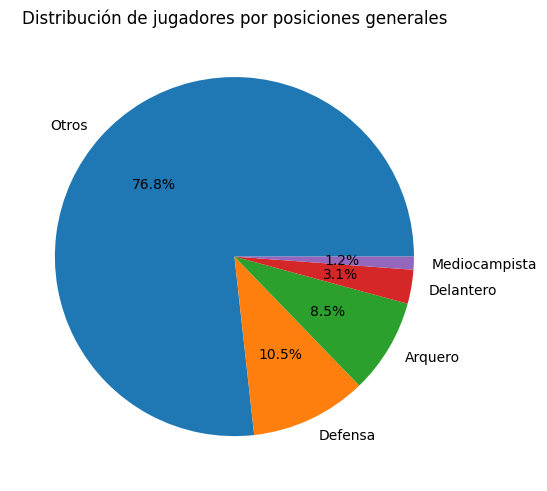

In [131]:
#Visualizamos las posiciones de los jugadores

#Creamos la figura
fig, ax = plt.subplots(layout='constrained')
#Creamos un piechart para conocer el porcentaje de jugadores por posición
df_futbol['Posicion_general'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Distribución de jugadores por posiciones generales")
ax.set_ylabel("")
plt.show()

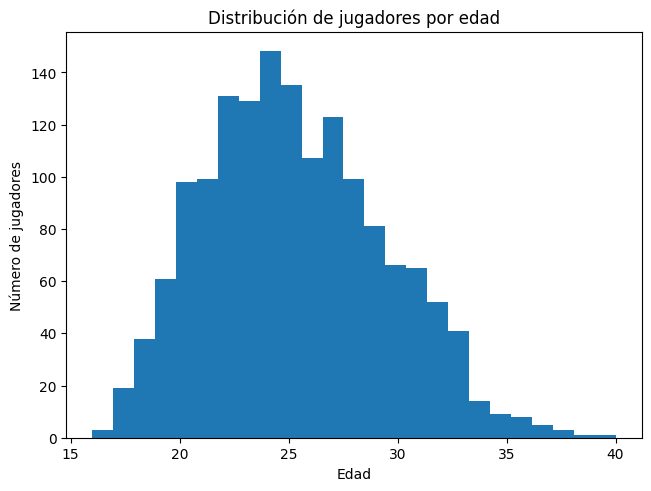

In [132]:
#Visualizamos la edad de los jugadores

conteo_de_edades = df_futbol['Edad'].value_counts().sort_index() #Ya no tendriamos que hacer value_counts ordenado,
#solo podemos hacer histograma
plt.figure(layout='constrained')
plt.hist(df_futbol['Edad'], bins=25)
plt.title("Distribución de jugadores por edad")
plt.xlabel("Edad")
plt.ylabel("Número de jugadores")
plt.show()


Añadimos los nuevos insights a la descripción del entendimiento de datos

### Interpretación de visualización de variables categóricas:

Ahora conocemos que la mayoría de jugadores que juegan en una sola posición son defensas, mediocampistas y delanteros.

### Interpretación de visualización de variables numéricas:
Sabemos que la edad de los jugadores tiene picos más altos entre los 22 y los 26 años, con una minoría de jugadores menores de 20 años y de jugadores mayores de 35 años.

## Retomamos el manejo de la columna multivalor Posición:

### Duplicación de jugadores con multivalor en Posición

- En la creación de la columna Posición_general, hicimos que los jugadores con múltiples posiciones fueran agrupados en la categoría “Otros”.

- En lugar de agruparlos únicamente en la categoría “Otros”, decidimos duplicar esos registros, de modo que cada jugador aparezca tantas veces como posiciones tenga en un partido.

- Esta estrategia evita la pérdida de información de las posiciones, ya que cada posición de un mismo jugador puede ser relevante para explicar su valor de mercado y desempeño en el campo.

- Esto lo hacemos porque el número de jugadores con posiciones múltiples no es alto, pero se gana precisión en el análisis por rol.

In [133]:
antes = df_futbol.shape[0]


#Hacemos una copia por si acaso
df_futbol_roles = df_futbol.copy()

#Recordar que ya teniamos un dict de mapeo llamado nombres_posiciones

#Separamos las posiciones que tienen los jugadores en listas
df_futbol_roles['Posicion_lista'] = (df_futbol_roles['Posicion'].fillna('').astype(str).str.split(','))

#Hacemos explode la lista, eso hace que se cree una fila por cada elemento de esa lista (como por ejemplo: Juan CB, RB
#Eso nos dejaria con las filas: Juan CB y Juan RB (2 filas, cada una con el rol)
df_futbol_roles = df_futbol_roles.explode('Posicion_lista', ignore_index=True)


#Limpiamos los espacios en blanco que pudieron quedar con el split de antes (no queremos cositas como " RB", no espacios, nada de eso)
df_futbol_roles['Posicion_lista'] = df_futbol_roles['Posicion_lista'].astype(str).str.strip()
df_futbol_roles = df_futbol_roles[df_futbol_roles['Posicion_lista'] != '']

#Mapeamos a las categorías generales con nuestro dict (a Defensa, Mediocampo, ...)
df_futbol_roles['Posicion_general'] = (df_futbol_roles['Posicion_lista'].map(nombres_posiciones).fillna('Otros'))

#Ahora Otros es cuando no existia un multivalor con las posiciones clasicas específicas
#Eliminamos la columna Posicion_lista, que ya no nos resulta util, ya tenemos Posicion_general
#Eliminamos la columna Posicion, que tiene la posicion especifica, y ya tampoco nos es util
df_futbol_roles = df_futbol_roles.drop(columns=['Posicion_lista','Posicion'])

despues = df_futbol_roles.shape[0]

print("Duplicaciones:", despues - antes)

Duplicaciones: 5818


## Revisión del nuevo dataset df_futbol_roles hasta este momento

In [134]:
df_futbol_roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7354 entries, 0 to 7353
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         7354 non-null   object 
 1   Nacionalidad                    7354 non-null   object 
 2   Edad                            7354 non-null   float64
 3   Goles                           7354 non-null   float64
 4   Tiros Totales                   7354 non-null   float64
 5   xG                              7354 non-null   float64
 6   npxG                            7354 non-null   float64
 7   xAG                             7354 non-null   float64
 8   Acciones_que_crean_tiros        7354 non-null   float64
 9   Pases_intentados                7354 non-null   float64
 10  Pases_progresivos               7354 non-null   float64
 11  Regates_exitosos                7354 non-null   float64
 12  Pases_medios_completados        73

In [135]:
#Revisemos las variables categoricas con un value_counts

#Veamos cuantas nacionalidades hay y la frecuencia por ellas
print("\nDistribución de nacionalidades:")
print(df_futbol_roles['Nacionalidad'].value_counts())

#¿Todas las nacionalidades cumplen formato de 3 letras en mayúscula?
mask_formato = df_futbol_roles['Nacionalidad'].str.fullmatch(r'[A-Z]{3}') #Si matchean el formato o no
print("\nTotal con formato correcto:", mask_formato.sum())
print("Total registros:", len(df_futbol_roles))
print("Registros incorrectos:", (~mask_formato).sum())

print("------")
#Veamos cuantas posiciones hay y la frecuencia por ellas
print("\nDistribución de posiciones generales:")
print(df_futbol_roles['Posicion_general'].value_counts())


Distribución de nacionalidades:
Nacionalidad
ESP    1373
FRA     964
ENG     684
ITA     577
BRA     266
       ... 
MAS       1
EST       1
MAD       1
BIH       1
MTQ       1
Name: count, Length: 100, dtype: int64

Total con formato correcto: 7354
Total registros: 7354
Registros incorrectos: 0
------

Distribución de posiciones generales:
Posicion_general
Mediocampista    3505
Delantero        1948
Defensa          1769
Arquero           132
Name: count, dtype: int64


## Hagamos la transformación de variables categóricas a numéricas

Actualmente tenemos las variables categóricas Nacionalidad y Posición General.

- Nacionalidad: Se convierte con OneHotEncoder porque es una variable categórica de tipo nominal, es decir, que no existe un orden jerárquico entre las nacionalidades. No hay una mayor o prioritaria a otra.

- Posición General: Se aplica OneHotEncoder porque representa categorías nominales como arquero, defensa, mediocampista y delantero. No tiene sentido asignarles números directos (ejemplo: 1 = arquero, 2 = defensa), ya que eso implicaría un orden que en la vida real no existe.

In [136]:
from sklearn.preprocessing import OneHotEncoder

#Tomamos las columnas categóricas a vectorizar
categoricas_vectorizar = ['Posicion_general']

#Inicializamos el encoder
ohe = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

#Hacemos la codificacion
encoded = ohe.fit_transform(df_futbol_roles[categoricas_vectorizar])

#Pasamos a DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categoricas_vectorizar))

#Las ponemos en el dataset original y quitamos las categóricas originales sin vectorizar de nacionalidad y posicion general
df_futbol_vectorizado = pd.concat( [df_futbol_roles.drop(columns= categoricas_vectorizar).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

df_futbol_vectorizado.head()

Jugador Nacionalidad  Edad  Goles  Tiros Totales        xG  \
0  Aaron Ciammaglichella          ITA  19.0    0.0       0.000000  0.000000   
1           Aaron Martin          ESP  27.0    0.0       0.444444  0.016667   
2           Aaron Martin          ESP  27.0    0.0       0.444444  0.016667   
3           Aaron Martin          ESP  27.0    0.0       0.444444  0.016667   
4           Aaron Martin          ESP  27.0    0.0       0.444444  0.016667   

       npxG   xAG  Acciones_que_crean_tiros  Pases_intentados  ...  \
0  0.000000  0.00                  0.000000          0.000000  ...   
1  0.016667  0.15                  2.638889         46.805556  ...   
2  0.016667  0.15                  2.638889         46.805556  ...   
3  0.016667  0.15                  2.638889         46.805556  ...   
4  0.016667  0.15                  2.638889         46.805556  ...   

   Perdida_balon  Pases_recibidos  Pases_progresivos_recibidos  \
0       0.000000         0.000000                          0.0   
1       0.472222        28.861111                          3.0   
2       0.472222        28.861111                          3.0   
3       0.472222        28.861111                          3.0   
4       0.472222        28.861111                          3.0   

   Faltas_cometidas   Centros  Duelos_aereos_ganados  market_value  \
0          0.000000  0.000000               0.000000      700000.0   
1          1.055556  7.111111               0.555556     6500000.0   
2          1.055556  7.111111               0.555556     6500000.0   
3          1.055556  7.111111               0.555556     6500000.0   
4          1.055556  7.111111               0.555556     6500000.0   

   Posicion_general_Defensa  Posicion_general_Delantero  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         1.0   
3                       0.0                         1.0   
4                       0.0                         0.0   

   Posicion_general_Mediocampista  
0                             1.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             1.0  

[5 rows x 39 columns]

## Tomamos df_futbol_vectorizado y hacemos separación por jugador a lo largo de toda la temporada

Analizamos las variables de toda la temporada, pues puede ser que un jugador tuvo partidos muy buenos o muy malos, y queremos ver su desempeño general a lo largo de toda la temporada

In [137]:
# #Funcion que servira para hacer boxplots
import math as m
from sklearn.feature_selection import VarianceThreshold
from pandas.api.types import is_numeric_dtype
import scipy.stats as stats

#Funcion para graficar boxplots de todas las variables para verificar outliers
def boxplots(df):
    lenx,leny = df.shape
    print(lenx,leny)
    fig, axes = plt.subplots(m.ceil(leny/3), 3, figsize=(12,60))
    columnas=df.columns.tolist()
    columnas.remove("Jugador")
    for i in range(leny-1):
      name_columna=columnas[i]
      if not name_columna.startswith("Nacionalidad_"):
        axes[i//3, i%3].boxplot(df[name_columna])
        axes[i//3, i%3].set_title(name_columna)
    #Mostrar
    plt.tight_layout()
    plt.show()

#Dataframe

In [138]:
# Quitamos columnas de nacionalidad, pues presentan algunas nacionalidades que solo tienen uno o dos jugadores, con lo cual, va a hacer overfitting sobre estos datos
df_futbol_vectorizado.drop(columns=["Nacionalidad"],inplace=True)


# Etapa 3. Modelado
Utilizando las variables previamente seleccionadas, construir un modelo de regresión que estime la variable objetivo con el menor error posible.



## Construcción de modelos de regresión lineal


Construimos el modelo de regresión Lineal usando Regresion de Lasso y su análisis de desempeño

## Modelo general

In [139]:
import statsmodels.api as sm
import math as m
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


def standardize(series):
    s = pd.Series(series)
    return (s - s.mean())/s.std(ddof=1)

def modelo_evaluacion(df):
  X = df.drop(columns=["market_value"])
  y = df["market_value"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=123)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_train = pd.DataFrame(X_train, columns=X.columns)
  X_test = scaler.transform(X_test)
  X_test = pd.DataFrame(X_test, columns=X.columns)
  print("X_train:", X_train.shape, "| X_test:", X_test.shape)
  # model = LinearRegression()
  # model.fit(X_train, y_train)
  alphas = np.logspace(-2, 3, 10)  # entre 0.0001 y 10
  model = LassoCV(alphas=alphas, cv=5, max_iter=500000, random_state=42)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  metrics = {
      "R2_train": r2_score(y_train, y_pred_train),
      "R2_test": r2_score(y_test, y_pred_test),
      "RMSE_train": mean_squared_error(y_train, y_pred_train),
      "RMSE_test": mean_squared_error(y_test, y_pred_test),
      "MAE_train": mean_absolute_error(y_train, y_pred_train),
      "MAE_test": mean_absolute_error(y_test, y_pred_test),
      "MAPE_train": np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100,
      "MAPE_test": np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  }
  fitted_train = y_pred_train
  resid_train = y_train - y_pred_train
  print(pd.Series(metrics))

  n_vars = X_train.shape[1]

  fig, axes = plt.subplots(m.ceil((n_vars+1)/3), 3, figsize=(12, 60))
  # 1. Residuos vs Predicciones (MÁS IMPORTANTE)
  axes[0,0].scatter(y_pred_train, resid_train, alpha=0.6)
  axes[0,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
  axes[0,0].set_xlabel('Valores Predichos')
  axes[0,0].set_ylabel('Residuos')
  axes[0,0].set_title(f'Residuos vs Predicciones (R²={metrics["R2_train"]:.3f})')
  axes[0,0].grid(True, alpha=0.3)

  # 2. Residuos vs Variables
  for i in range(1,n_vars):
    axes[i//3, i%3].scatter(X_train[X_train.columns[i]], resid_train, alpha=0.6, color='green')
    axes[i//3, i%3].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[i//3, i%3].set_xlabel(X_train.columns[i])
    axes[i//3, i%3].set_ylabel('Residuos')
    axes[i//3, i%3].set_title(f'Residuos vs {X_train.columns[i]}')
    axes[i//3, i%3].grid(True, alpha=0.3)

  # 4. Q-Q Plot
  stats.probplot(resid_train, dist="norm", plot=axes[(n_vars)//3, (n_vars)%3])
  axes[(n_vars)//3, (n_vars)%3].set_title('Q-Q Plot (Normalidad)')
  axes[(n_vars)//3, (n_vars)%3].grid(True, alpha=0.3)

  print(f"R² = {metrics['R2_train']:.3f}")
  print(f"Media de residuos: {np.mean(resid_train):.6f} (debe ser ≈0)")
  print(f"Desviación estándar: {np.std(resid_train):,.2f}")
  print(f"Residuo máximo: {np.max(np.abs(resid_train)):,.2f}")

  plt.tight_layout()
  plt.show()


  plt.figure()
  plt.hist(resid_train, bins=20)
  plt.title("Histograma de residuos (train)")
  plt.xlabel("Residuo")
  plt.ylabel("Frecuencia")
  plt.show()

  z_resid = standardize(resid_train)
  outliers_idx = z_resid[abs(z_resid) > 3].index
  print(f"Posibles outliers por |residuo estandarizado|>3: {len(outliers_idx)}")
  print(f"Indices de outliers:{outliers_idx}")
  return model, resid_train, outliers_idx,scaler


### Análisis de outliers


7354 38


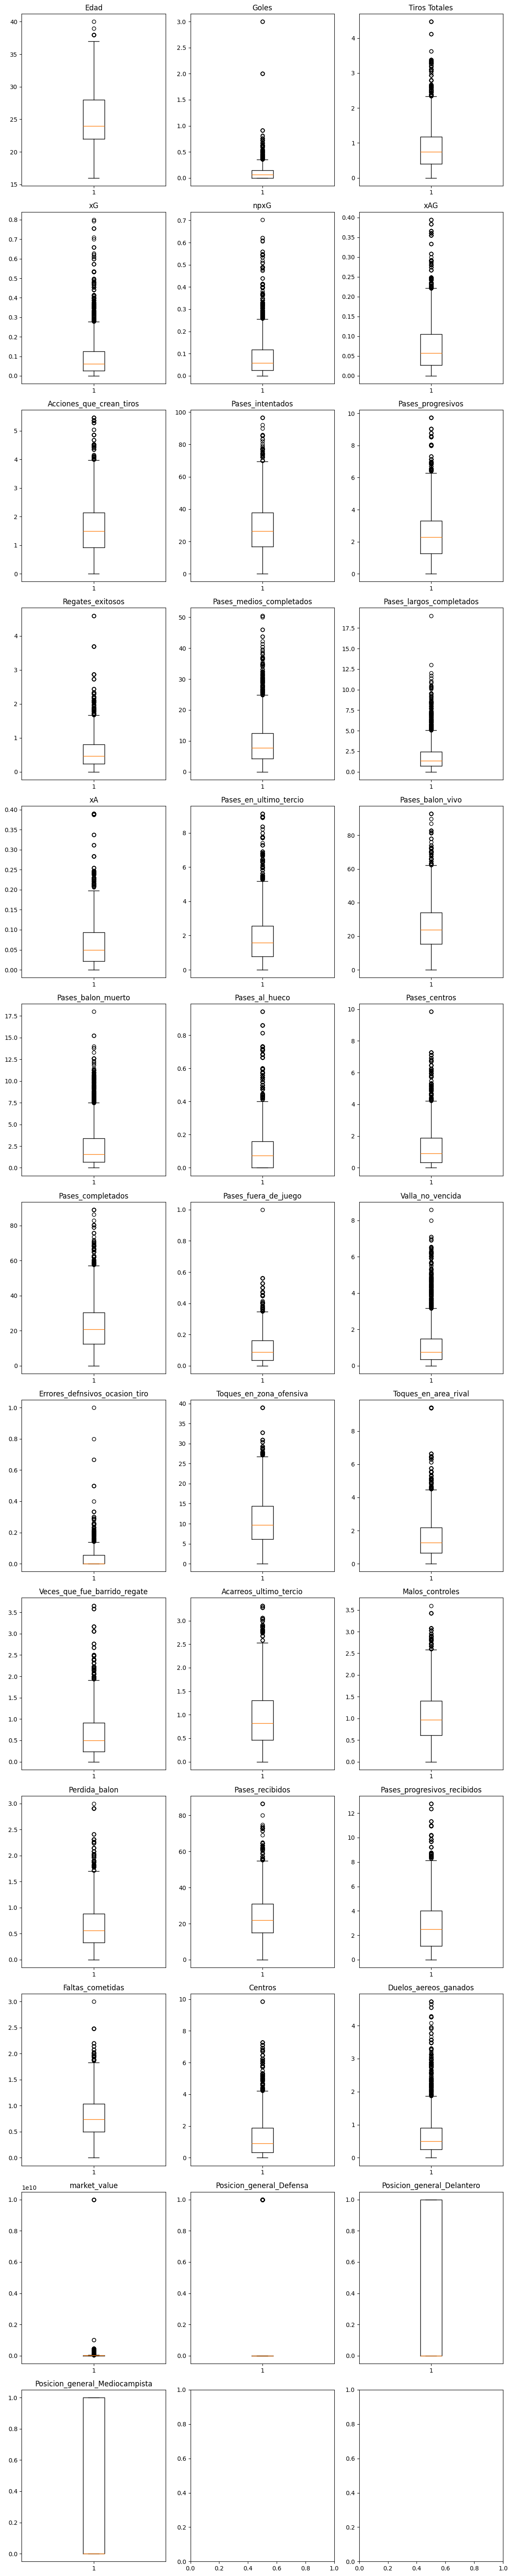

In [140]:
boxplots(df_futbol_vectorizado)

Vemos un outlier en los precios de mercado, los eliminamos para borrar el ruido en el modelo

7219 38


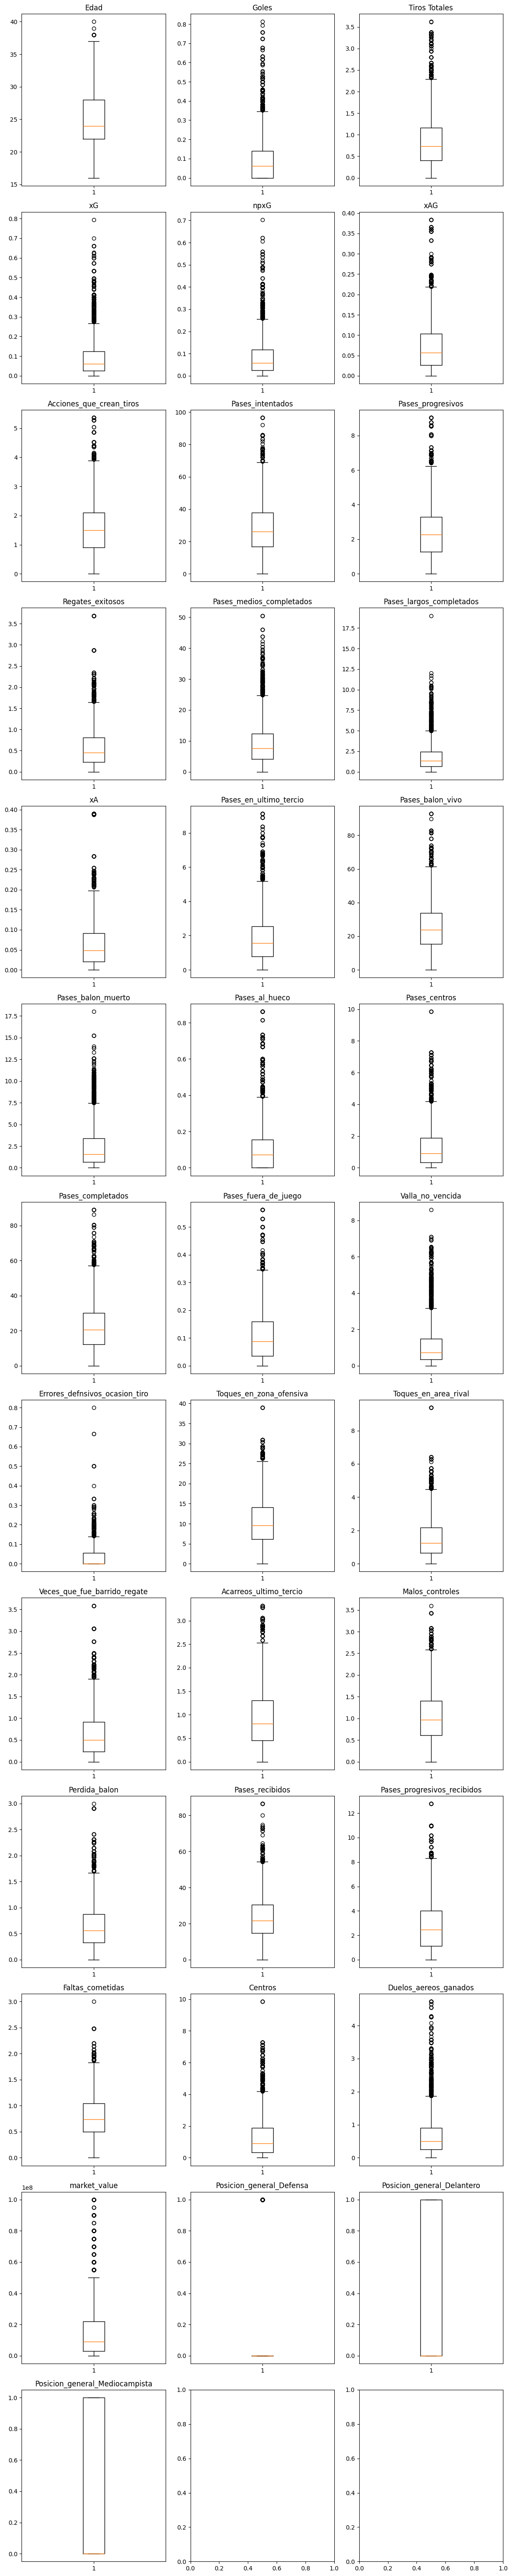

In [141]:
#Eliminamos outliers de precio
df_futbol_vectorizado = df_futbol_vectorizado[df_futbol_vectorizado["market_value"] <= 100e6]
#Volcemos a verificar distribuciones
boxplots(df_futbol_vectorizado)

### Eliminacion Variables de Varianza 0
Eliminamos estos datos porque no aportan al modelo

X_train: (6497, 36) | X_test: (722, 36)
R2_train      5.345787e-01
R2_test       4.522120e-01
RMSE_train    1.501612e+14
RMSE_test     1.901650e+14
MAE_train     8.736004e+06
MAE_test      9.827116e+06
MAPE_train    2.362853e+02
MAPE_test     2.162773e+02
dtype: float64
R² = 0.535
Media de residuos: -0.000000 (debe ser ≈0)
Desviación estándar: 12,254,026.86
Residuo máximo: 68,061,200.20


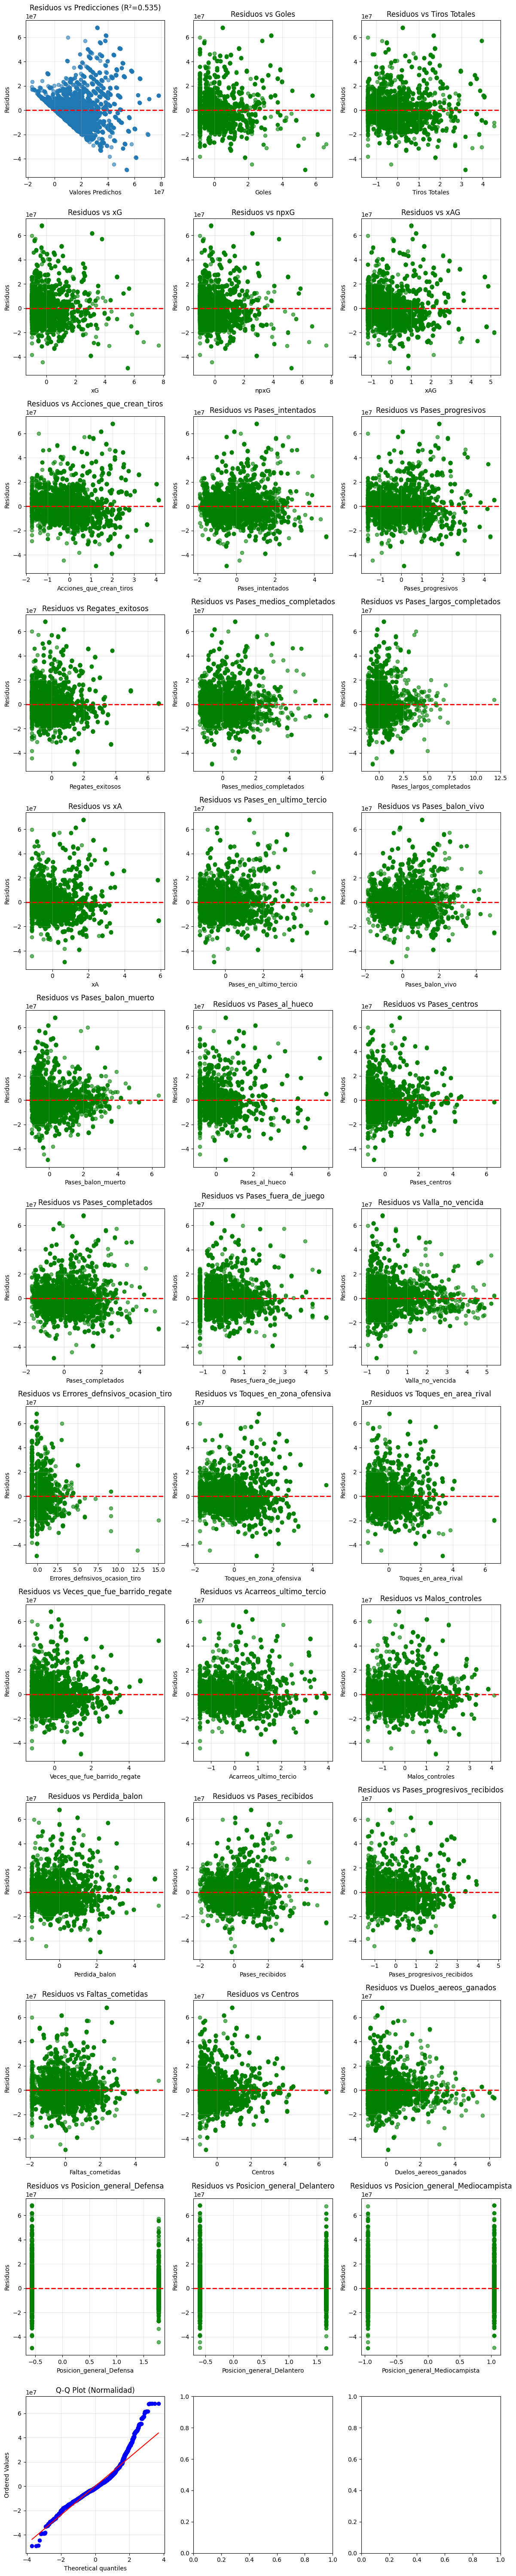

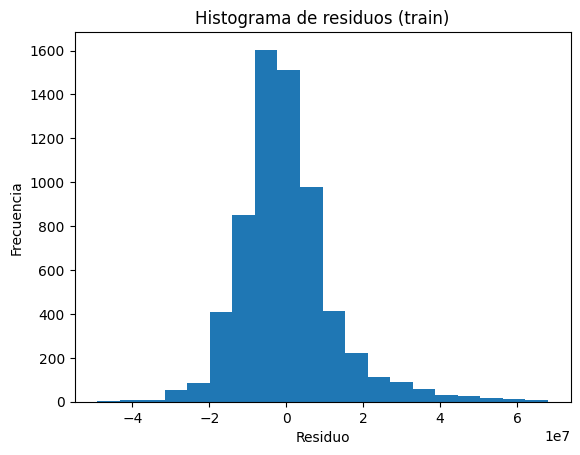

Posibles outliers por |residuo estandarizado|>3: 111
Indices de outliers:Index([1692, 3602, 1362, 5019,  437, 6000, 5670, 5666, 1114, 5667,
       ...
       6737, 5660, 5189,  321,  438, 1111,  826, 1092, 1363, 5664],
      dtype='int64', length=111)


In [142]:
from sklearn.feature_selection import VarianceThreshold
#Borramos columnas de varianza 0(que no aportan al modelo)
selector = VarianceThreshold(threshold=0)
jugadores=df_futbol_vectorizado["Jugador"]
df_auxiliar=df_futbol_vectorizado.drop(columns=["Jugador"])
matriz_limpia = selector.fit_transform(df_auxiliar)
columnas_mantenidas = selector.get_feature_names_out()
df_auxiliar=pd.DataFrame(matriz_limpia, columns=columnas_mantenidas)
#Creamos el modelo y lo evaluamos
lasso,residuos,outliers,scaler=modelo_evaluacion(df_auxiliar)
df_auxiliar_no_market_value=df_auxiliar.drop(columns=["market_value"])
#Guardamos las predicciones
array_predicciones=lasso.predict(df_auxiliar_no_market_value)
df_predicho = pd.DataFrame(array_predicciones, columns=["valores"])
df_predicho["Jugador"]=jugadores


### Selección de Variables

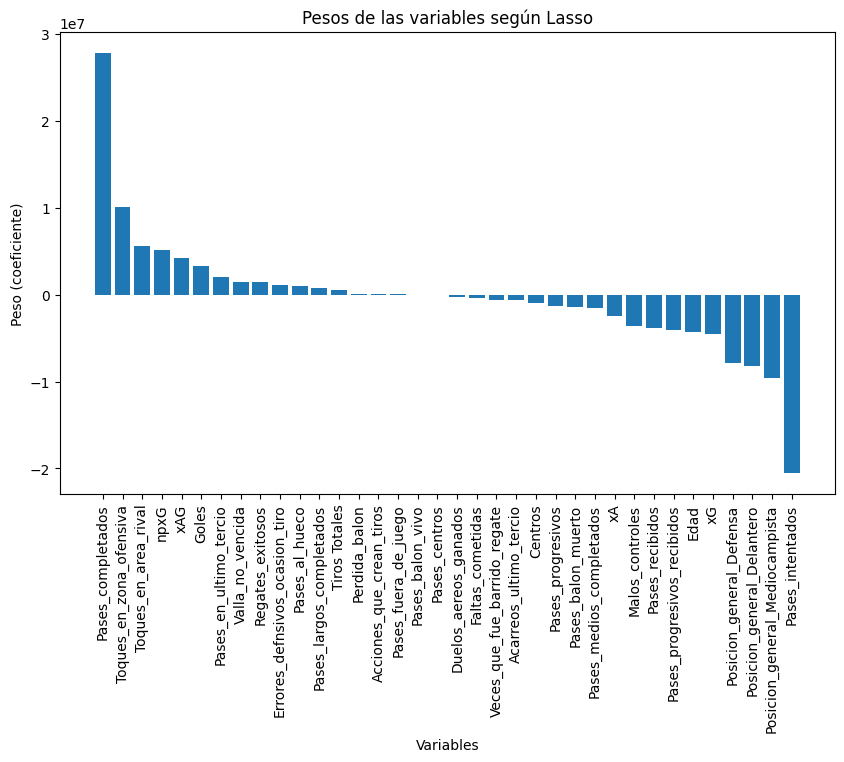

In [143]:
#Analizamos los pesos asignados por el algoritmo Lasso
coef = lasso.coef_
features = df_futbol_vectorizado.columns.tolist()  # nombres de las variables
features.remove('market_value')
features.remove("Jugador")
# Armamos DataFrame para ordenarlos
coef_df = pd.DataFrame({
    "Variable": features,
    "Peso": coef
}).sort_values(by="Peso", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(coef_df["Variable"], coef_df["Peso"])
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Peso (coeficiente)")
plt.title("Pesos de las variables según Lasso")
plt.show()


Matriz de correlación (sin nacionalidad): (37, 37)


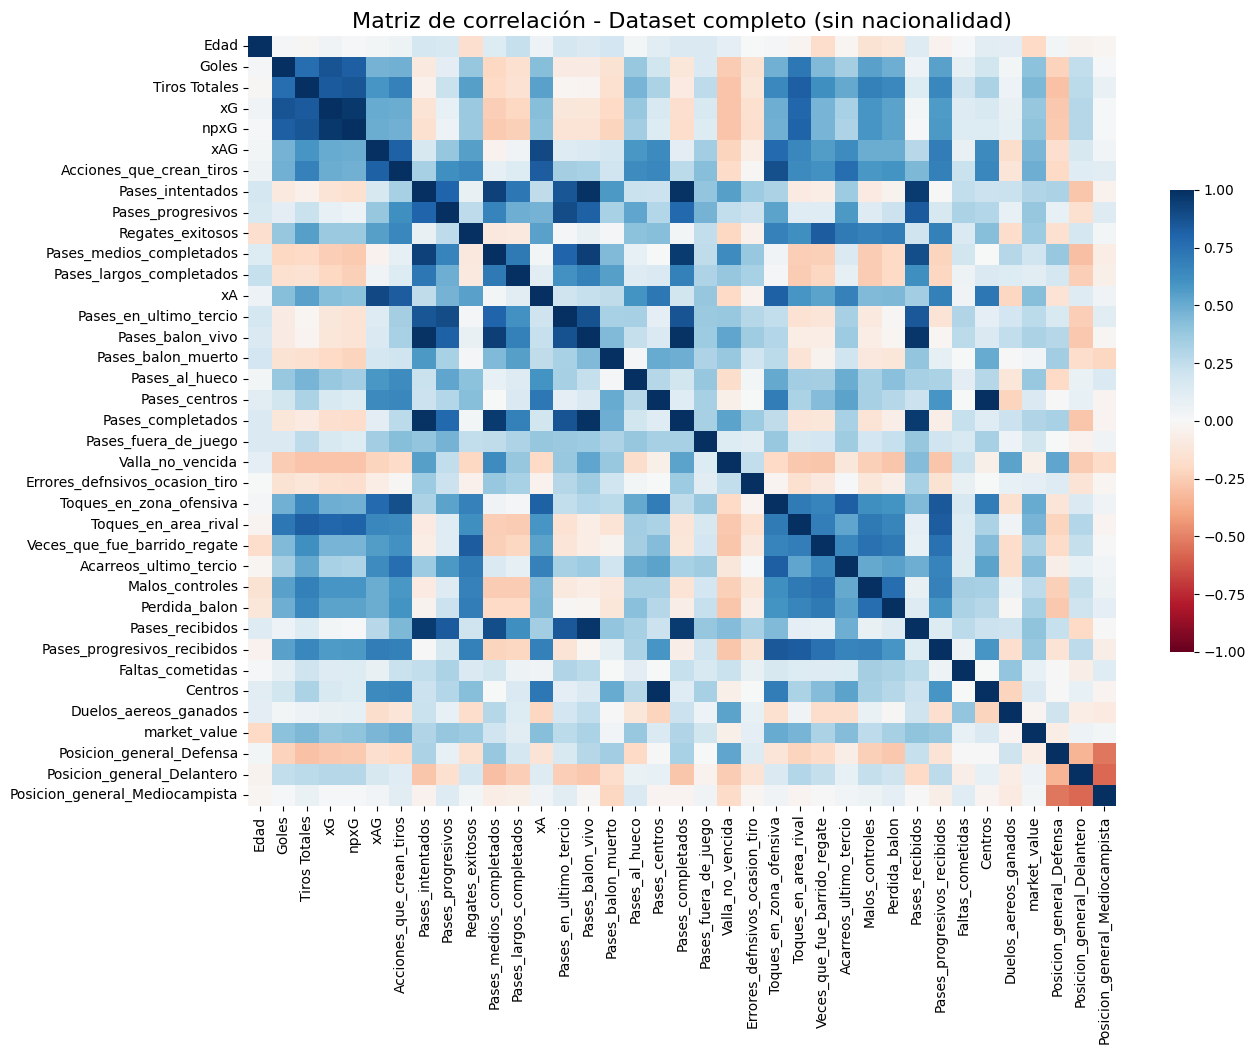

In [144]:
columnas_eliminar=[c for c in df_futbol_vectorizado.columns if c.startswith("Nacionalidad_")]
columnas_eliminar.append("Jugador")
df_sin_nacionalidad = df_futbol_vectorizado.drop(
    columns=columnas_eliminar,
    errors="ignore"
)

# Calculamos la matriz de correlación sin nacionalidad
corr_matrix_total_clean = df_sin_nacionalidad.corr()

# Revisamos dimensiones
print("Matriz de correlación (sin nacionalidad):", corr_matrix_total_clean.shape)

# Graficamos
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix_total_clean,
            cmap="RdBu",
            center=0,
            vmin=-1, vmax=1,
            annot=False,
            cbar_kws={"shrink": .6})
plt.title("Matriz de correlación - Dataset completo (sin nacionalidad)", fontsize=16)
plt.show()

## Análisis de primera iteración
Vemos que se tiene colinealidad tanto con el VIF como con la matriz de correlación, solucionamos esto para ajustar nuestro modelo y ver si se cumplen los supuestos de regresión lineal

In [145]:
df_futbol_vectorizado.drop(columns=["npxG","Pases_intentados","Pases_balon_vivo","Pases_recibidos","Centros","Pases_completados","Pases_medios_completados"], inplace=True)

X_train: (6497, 29) | X_test: (722, 29)
R2_train      5.144057e-01
R2_test       4.295065e-01
RMSE_train    1.566697e+14
RMSE_test     1.980472e+14
MAE_train     8.923013e+06
MAE_test      9.964545e+06
MAPE_train    2.361157e+02
MAPE_test     2.224104e+02
dtype: float64
R² = 0.514
Media de residuos: -0.000000 (debe ser ≈0)
Desviación estándar: 12,516,776.84
Residuo máximo: 68,730,828.29


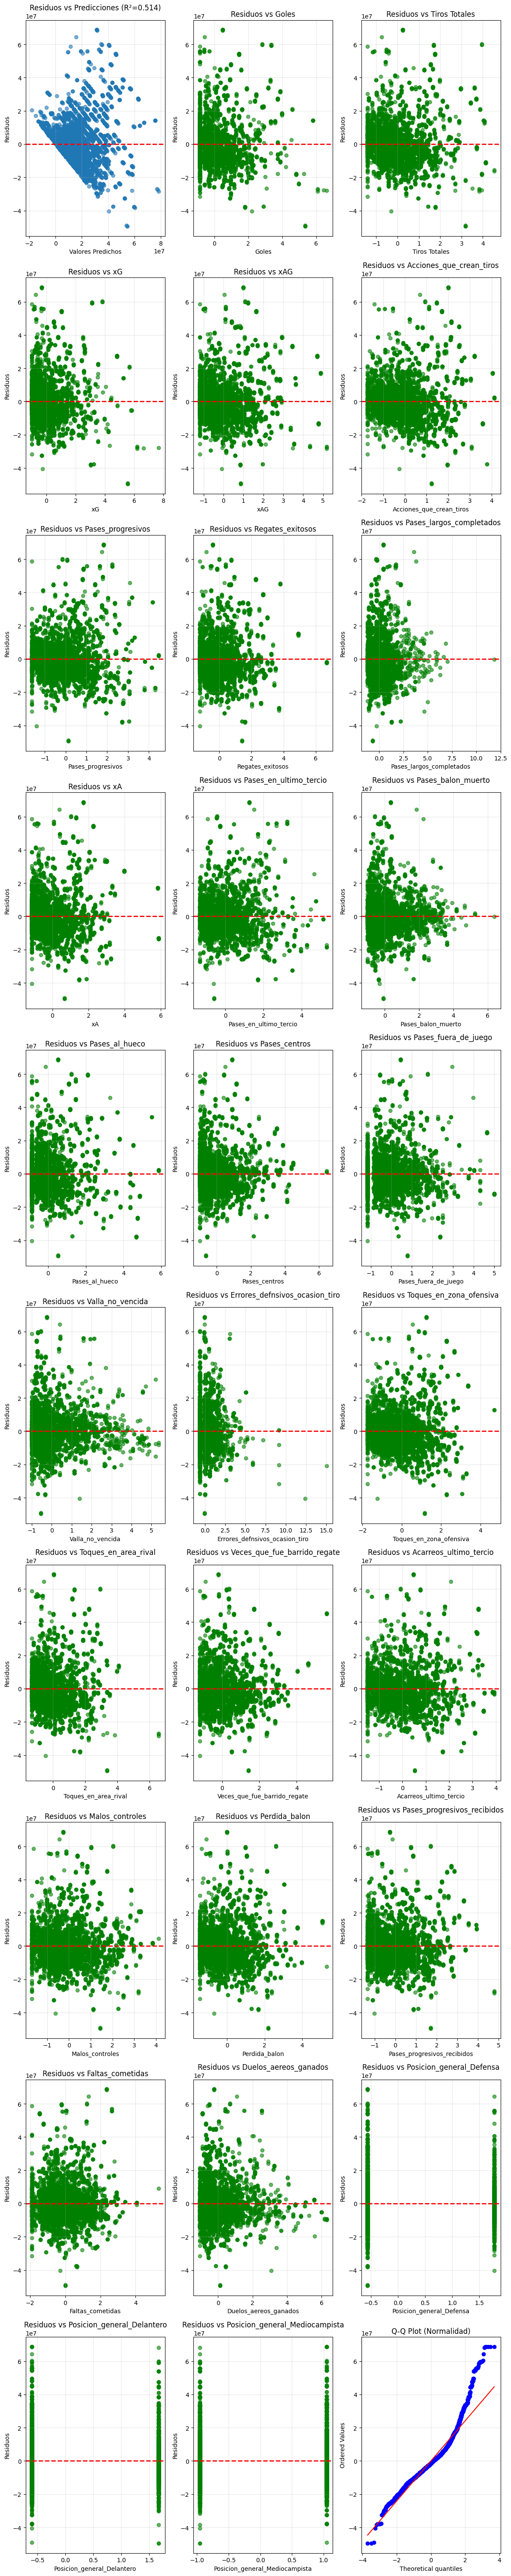

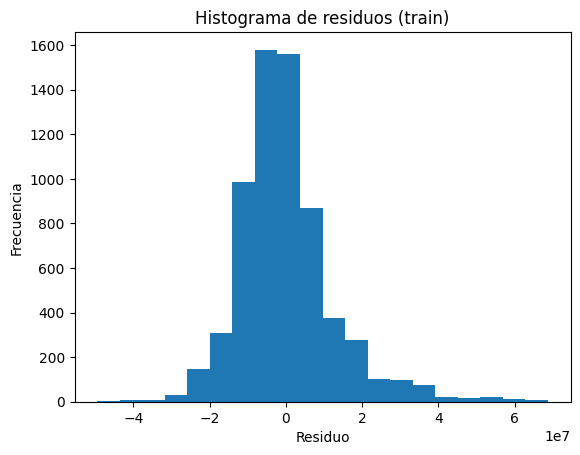

Posibles outliers por |residuo estandarizado|>3: 105
Indices de outliers:Index([1692, 3602, 1362, 2789, 5019,  437, 6000, 5670, 5666, 5667,
       ...
       3940, 5660, 5189,  321,  438, 3971, 1092, 2894, 1363, 5664],
      dtype='int64', length=105)


In [146]:
selector = VarianceThreshold(threshold=0)
df_auxiliar=df_futbol_vectorizado.drop(columns=["Jugador"])
matriz_limpia = selector.fit_transform(df_auxiliar)
columnas_mantenidas = selector.get_feature_names_out()
df_auxiliar=pd.DataFrame(matriz_limpia, columns=columnas_mantenidas)

lasso,residuos,outliers,scaler=modelo_evaluacion(df_auxiliar)
df_auxiliar_no_market_value=df_auxiliar.drop(columns=["market_value"])
array_predicciones=lasso.predict(df_auxiliar_no_market_value)

df_predicho = pd.DataFrame(array_predicciones, columns=["valores"])
df_predicho["Jugador"]=jugadores

Volvemos a verificar los pesos asignados por el modelo

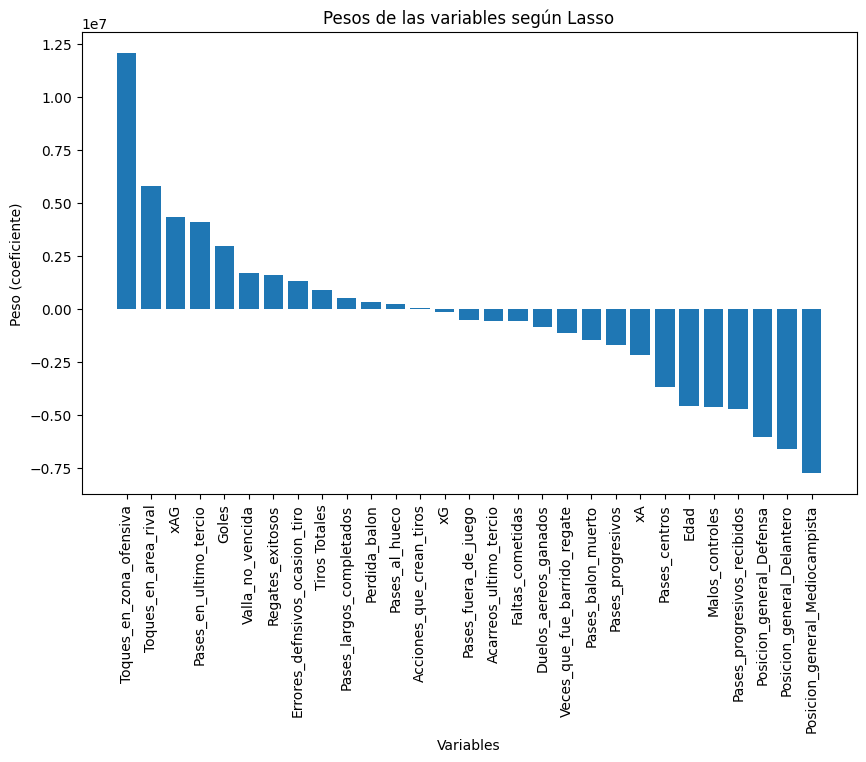

['Edad',
 'Goles',
 'Tiros Totales',
 'xG',
 'xAG',
 'Acciones_que_crean_tiros',
 'Pases_progresivos',
 'Regates_exitosos',
 'Pases_largos_completados',
 'xA',
 'Pases_en_ultimo_tercio',
 'Pases_balon_muerto',
 'Pases_al_hueco',
 'Pases_centros',
 'Pases_fuera_de_juego',
 'Valla_no_vencida',
 'Errores_defnsivos_ocasion_tiro',
 'Toques_en_zona_ofensiva',
 'Toques_en_area_rival',
 'Veces_que_fue_barrido_regate',
 'Acarreos_ultimo_tercio',
 'Malos_controles',
 'Perdida_balon',
 'Pases_progresivos_recibidos',
 'Faltas_cometidas',
 'Duelos_aereos_ganados',
 'Posicion_general_Defensa',
 'Posicion_general_Delantero',
 'Posicion_general_Mediocampista']

In [147]:
coef = lasso.coef_
features = df_futbol_vectorizado.columns.tolist()  # nombres de las variables
features.remove('market_value')
features.remove("Jugador")
# Armamos DataFrame para ordenarlos
coef_df = pd.DataFrame({
    "Variable": features,
    "Peso": coef
}).sort_values(by="Peso", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(coef_df["Variable"], coef_df["Peso"])
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Peso (coeficiente)")
plt.title("Pesos de las variables según Lasso")
plt.show()
features

## Construcción del pipeline, modelo final

Teniendo en cuenta las operaciones necesarias para evaluar y generar predicciones, construimos el pipeline que requerimos

In [148]:
def transformar_posicion(posicion):
    if "," in posicion:
        posiciones = posicion.split(",")
        return posiciones[0]
    else:
        return posicion


from sklearn.pipeline import Pipeline


variables=["Jugador",'Edad',"Posicion",'Goles','Tiros Totales','xG','xAG','Acciones_que_crean_tiros','Pases_progresivos',
        'Regates_exitosos','Pases_largos_completados','xA','Pases_en_ultimo_tercio','Pases_balon_muerto','Pases_al_hueco',
        'Pases_centros','Pases_fuera_de_juego','Valla_no_vencida','Errores_defnsivos_ocasion_tiro','Toques_en_zona_ofensiva',
        'Toques_en_area_rival','Veces_que_fue_barrido_regate','Acarreos_ultimo_tercio','Malos_controles','Perdida_balon',
        'Pases_progresivos_recibidos','Faltas_cometidas','Duelos_aereos_ganados']

agg_funcs = {}

for col in variables:
    if col in ["Edad"]:
        agg_funcs[col] = "first"
    elif pd.api.types.is_numeric_dtype(df_futbol[col]):
        #agg_funcs[col]= ["sum","mean","min","max"]
        agg_funcs[col]= "mean"
    elif col=='Posicion':
        agg_funcs[col] = lambda x: ", ".join(x.astype(str).unique())

class MiPipeline(Pipeline):
    def __init__(self, modelo=None):
        self.modelo = modelo if modelo is not None else Lasso()
    def fit(self, X, y=None):
        pass

    def predict(self, X, **predict_params):
        X_original=X.copy()

        X=X[variables]
        X=X.groupby('Jugador').agg(agg_funcs).reset_index()
        X["Posicion"]=X["Posicion"].apply(transformar_posicion)
        X['Edad'] = pd.to_numeric(X['Edad'].str.split('-').str[0], errors='coerce')
        nombres_posiciones = {
            'GK': 'Arquero',
            'CB': 'Defensa',
            'RB': 'Defensa',
            'LB': 'Defensa',
            'WB': 'Defensa',
            'CM': 'Mediocampista',
            'DM': 'Mediocampista',
            'AM': 'Mediocampista',
            'LM': 'Mediocampista',
            'RM': 'Mediocampista',
            'FW': 'Delantero',
            'ST': 'Delantero',
            'CF': 'Delantero',
            'LW': 'Delantero',
            'RW': 'Delantero'
        }

        #Nueva columna del df con la posición ya mapeada para poder graficar
        #En otros estan los no incluidos, o los jugadores que juegan varias posiciones
        X['Posicion_general'] = X['Posicion'].map(nombres_posiciones).fillna('Otros')
        #Hacemos la codificacion
        ohe = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
        encoded = ohe.fit_transform(X[['Posicion_general']])

        #Inicializamos el encoder
        X_codificador = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categoricas_vectorizar))
        X_copia=X.copy()
        X.drop(columns=["Jugador"],inplace=True)
        X = pd.concat( [X.drop(columns= ["Posicion",'Posicion_general']).reset_index(drop=True), X_codificador.reset_index(drop=True)], axis=1)
        columnas=X.columns
        X = pd.DataFrame(scaler.transform(X), columns=columnas)
        #Count NaN values
        X = X.fillna(X.mean(numeric_only=True))
        X["prediccion"] = self.modelo.predict(X)
        X["Jugador"] =X_copia["Jugador"]
        df_predicciones=X_original.merge(X[["Jugador","prediccion"]], on="Jugador")
        return df_predicciones["prediccion"]

X = pd.read_csv('./datos_validacion_laboratorio1(test_data).csv')
pipe = MiPipeline(modelo=lasso)
pipe.fit(X,X) #No importante, usamos el modelo ya entrenado con los datos de arriba



Text(0.5, 1.0, 'Dispersion de datos predichos')

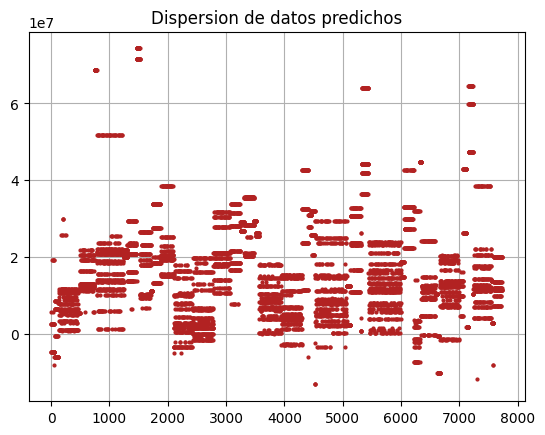

In [149]:
plt.plot(pipe.predict(X),linestyle="",marker="o", label='Predicción',color="firebrick",markersize=2)
plt.grid()
plt.title("Dispersion de datos predichos")

In [150]:
import joblib
joblib.dump(pipe, "pipeline_entrenado.joblib")


['pipeline_entrenado.joblib']

Text(0.5, 1.0, 'Dispersion de datos predichos')

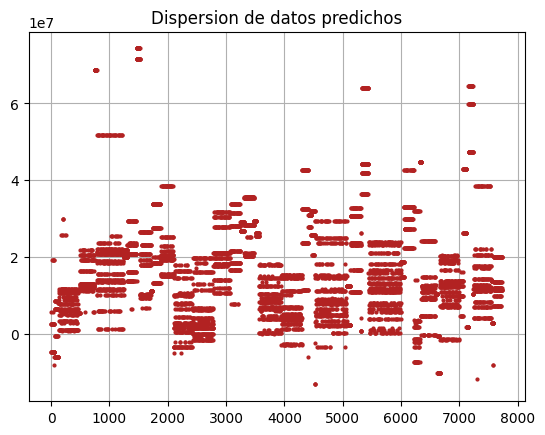

In [151]:
pipe_cargado = joblib.load("pipeline_entrenado.joblib")
plt.plot(pipe_cargado.predict(X),linestyle="",marker="o", label='Predicción',color="firebrick",markersize=2)
plt.grid()
plt.title("Dispersion de datos predichos")

# Etapa 4. Evaluación cuantitativa:
A partir de las métricas seleccionadas para evaluar y seleccionar el mejor modelo, explicar el resultado obtenido desde el punto de vista cuantitativo. Contestar a la pregunta: ¿Su equipo recomienda utilizar en producción el modelo de regresión para estimar el precio de un jugador de fútbol? ¿Por qué? En caso de no recomendar el uso del modelo, ¿qué recomendaciones haría para continuar iterando con el objetivo de la construcción de un mejor modelo?


# Etapa 5. Evaluación cualitativa: 



## Validación de supuestos
Realizar los ajustes necesarios para que el modelo cumpla con los supuestos necesarios para la inferencia estadística con regresiones.

### 5.1. Colinealidad
Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad (correlación).

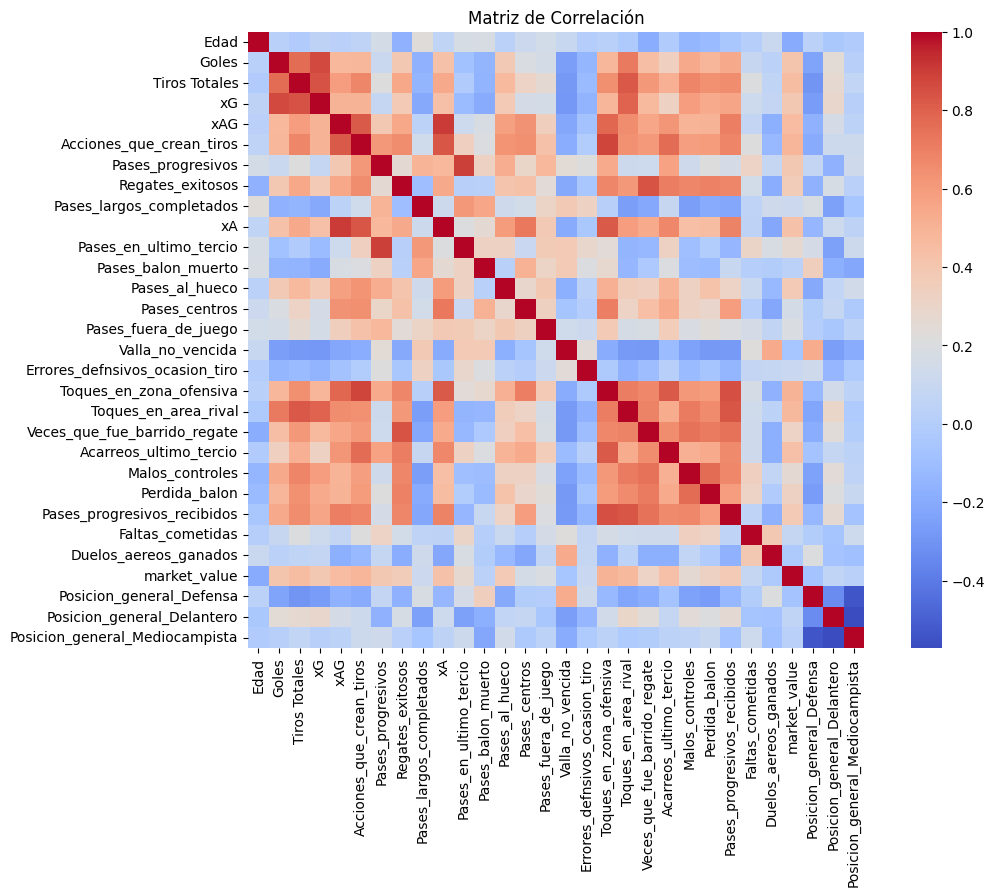

In [152]:
# Eliminar la columna "Jugador" para evitar conflicto de strings
df_sinjugadores = df_futbol_vectorizado.copy()
df_sinjugadores.drop(columns=["Jugador"], inplace=True)


#Matrix de correlacion
matriz_correlacion = df_sinjugadores.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()


In [153]:
# Encontrar parejas de variables con correlación mayor a 0.8
correlaciones_altas = []

# Recorrer la matriz de correlación
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        correlacion = abs(matriz_correlacion.iloc[i, j])
        
        if correlacion > 0.8:
            correlaciones_altas.append((var1, var2, correlacion))

# Ordenar por correlación descendente
correlaciones_altas.sort(key=lambda x: x[2], reverse=True)

# Imprimir las parejas
print("Parejas de variables con correlación > 0.8:")
print("-" * 60)
for var1, var2, corr in correlaciones_altas:
    print(f"{var1} - {var2}: {corr:.3f}")

Parejas de variables con correlación > 0.8:
------------------------------------------------------------
xAG - xA: 0.905
Pases_progresivos - Pases_en_ultimo_tercio: 0.894
Acciones_que_crean_tiros - Toques_en_zona_ofensiva: 0.878
Goles - xG: 0.866
Toques_en_zona_ofensiva - Pases_progresivos_recibidos: 0.851
Tiros Totales - xG: 0.843
Regates_exitosos - Veces_que_fue_barrido_regate: 0.835
Acciones_que_crean_tiros - xA: 0.833
Toques_en_area_rival - Pases_progresivos_recibidos: 0.828
Tiros Totales - Toques_en_area_rival: 0.825
Toques_en_zona_ofensiva - Acarreos_ultimo_tercio: 0.821
xA - Toques_en_zona_ofensiva: 0.818
xAG - Acciones_que_crean_tiros: 0.816


Variance Inflation Factor (VIF) por variable:
                          Variable        VIF
17         Toques_en_zona_ofensiva  73.669831
6                Pases_progresivos  51.978236
5         Acciones_que_crean_tiros  37.583358
0                             Edad  36.816859
10          Pases_en_ultimo_tercio  29.399920
23     Pases_progresivos_recibidos  29.270417
18            Toques_en_area_rival  27.656024
28  Posicion_general_Mediocampista  21.036435
9                               xA  20.777033
2                    Tiros Totales  19.285842
4                              xAG  16.595647
21                 Malos_controles  15.949719
3                               xG  14.652064
20          Acarreos_ultimo_tercio  14.295688
19    Veces_que_fue_barrido_regate  12.710948
27      Posicion_general_Delantero  12.137548
26        Posicion_general_Defensa  11.176759
7                 Regates_exitosos  11.117479
22                   Perdida_balon  10.366980
13                   Pases_centros

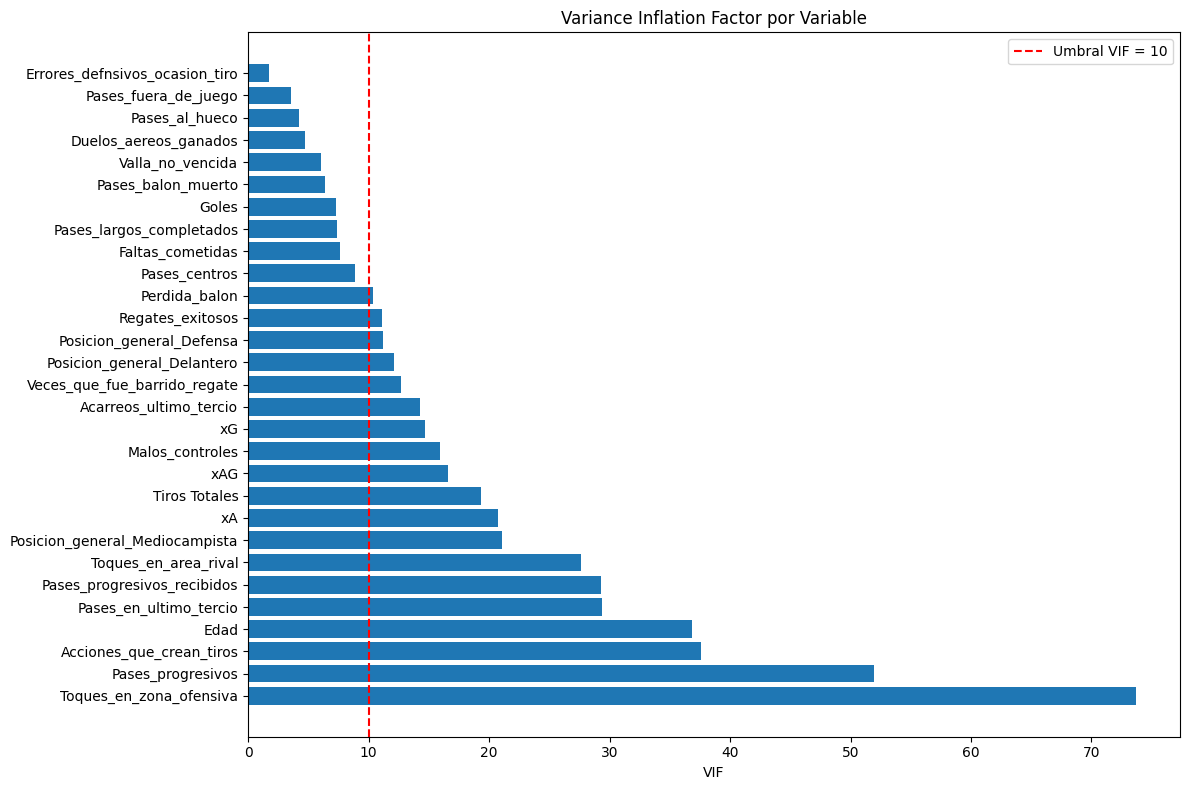

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preparar datos para VIF - usamos el dataset sin la variable objetivo
X_vif = df_sinjugadores.drop(columns=['market_value'])

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Ordenar por VIF descendente
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF) por variable:")
print("=" * 50)
print(vif_data)

# Identificar variables con VIF alto (>10 indica alta colinealidad)
vif_alto = vif_data[vif_data['VIF'] > 10]
print(f"\nVariables con VIF > 10 (alta colinealidad): {len(vif_alto)}")
print(vif_alto)

# Graficar los VIF
plt.figure(figsize=(12, 8))
plt.barh(vif_data['Variable'], vif_data['VIF'])
plt.xlabel('VIF')
plt.title('Variance Inflation Factor por Variable')
plt.axvline(x=10, color='red', linestyle='--', label='Umbral VIF = 10')
plt.legend()
plt.tight_layout()
plt.show()

#### Correccion Colinealidad

Hemos identificado varias variables con altos niveles de multicolinealidad, las cuales se vuelven redundantes dentro del modelo, vamos a proceder a escoger las mas interpretativas y eliminar las otras.

Contamos con 19 variables con alta multicolinealidad

- Toques_en_zona_ofensiva  73.669831
- Pases_progresivos  51.978236
- Acciones_que_crean_tiros  37.583358
- Edad  36.816859
- Pases_en_ultimo_tercio  29.399920
- Pases_progresivos_recibidos  29.270417
- Toques_en_area_rival  27.656024
- Posicion_general_Mediocampista  21.036435
- xA  20.777033
- Tiros Totales  19.285842
- xAG  16.595647
- Malos_controles  15.949719
- xG  14.652064
- Acarreos_ultimo_tercio  14.295688
- Veces_que_fue_barrido_regate  12.710948
- Posicion_general_Delantero  12.137548
- Posicion_general_Defensa  11.176759
- Regates_exitosos  11.117479
- Perdida_balon  10.366980


A su vez que contamos con 13 parejas que tienen alta correlación

- xAG - xA: 0.905
- Pases_progresivos - Pases_en_ultimo_tercio: 0.894
- Acciones_que_crean_tiros - Toques_en_zona_ofensiva: 0.878
- Goles - xG: 0.866
- Toques_en_zona_ofensiva - Pases_progresivos_recibidos: 0.851
- Tiros Totales - xG: 0.843
- Regates_exitosos - Veces_que_fue_barrido_regate: 0.835
- Acciones_que_crean_tiros - xA: 0.833
- Toques_en_area_rival - Pases_progresivos_recibidos: 0.828
- Tiros Totales - Toques_en_area_rival: 0.825
- Toques_en_zona_ofensiva - Acarreos_ultimo_tercio: 0.821
- xA - Toques_en_zona_ofensiva: 0.818
- xAG - Acciones_que_crean_tiros: 0.816


Se iterara por cada pareja y se eliminara la variable que cuya multicolinealidad es mayor (a no ser que algun criterio de interpretabilidad nos haga decidir lo contrario)
Bajo este criterio se decide eliminar:
- xA
- Pases_progresivos
- Acciones_que_crean_tiros
- xG
- Pases_progresivos_recibidos
- Veces_que_fue_barrido_regate
- Toques_en_area_rival
- Toques_en_zona_ofensiva





In [157]:
#Eliminar dichas variables
df_postColinealidad = df_sinjugadores.copy()
df_postColinealidad = df_postColinealidad.drop(columns=[
    'xA',
    'Pases_progresivos',
    'Acciones_que_crean_tiros',
    'xG',
    'Pases_progresivos_recibidos',
    'Veces_que_fue_barrido_regate',
    'Toques_en_area_rival',
    'Toques_en_zona_ofensiva'
])
df_postColinealidad 

Edad  Goles  Tiros Totales       xAG  Regates_exitosos  \
0     19.0    0.0       0.000000  0.000000          0.000000   
1     27.0    0.0       0.444444  0.150000          0.333333   
2     27.0    0.0       0.444444  0.150000          0.333333   
3     27.0    0.0       0.444444  0.150000          0.333333   
4     27.0    0.0       0.444444  0.150000          0.333333   
...    ...    ...            ...       ...               ...   
7348  24.0    0.0       0.761905  0.052381          0.380952   
7349  24.0    0.0       0.761905  0.052381          0.380952   
7350  24.0    0.0       0.761905  0.052381          0.380952   
7351  24.0    0.0       0.761905  0.052381          0.380952   
7352  24.0    0.0       0.761905  0.052381          0.380952   

      Pases_largos_completados  Pases_en_ultimo_tercio  Pases_balon_muerto  \
0                     0.000000                0.000000            0.000000   
1                     4.444444                2.138889           12.611111   
2                     4.444444                2.138889           12.611111   
3                     4.444444                2.138889           12.611111   
4                     4.444444                2.138889           12.611111   
...                        ...                     ...                 ...   
7348                  2.190476                1.095238            3.761905   
7349                  2.190476                1.095238            3.761905   
7350                  2.190476                1.095238            3.761905   
7351                  2.190476                1.095238            3.761905   
7352                  2.190476                1.095238            3.761905   

      Pases_al_hueco  Pases_centros  ...  Errores_defnsivos_ocasion_tiro  \
0                0.0       0.000000  ...                        0.000000   
1                0.0       7.111111  ...                        0.027778   
2                0.0       7.111111  ...                        0.027778   
3                0.0       7.111111  ...                        0.027778   
4                0.0       7.111111  ...                        0.027778   
...              ...            ...  ...                             ...   
7348             0.0       3.380952  ...                        0.095238   
7349             0.0       3.380952  ...                        0.095238   
7350             0.0       3.380952  ...                        0.095238   
7351             0.0       3.380952  ...                        0.095238   
7352             0.0       3.380952  ...                        0.095238   

      Acarreos_ultimo_tercio  Malos_controles  Perdida_balon  \
0                   0.000000         0.000000       0.000000   
1                   0.861111         0.611111       0.472222   
2                   0.861111         0.611111       0.472222   
3                   0.861111         0.611111       0.472222   
4                   0.861111         0.611111       0.472222   
...                      ...              ...            ...   
7348                0.333333         1.238095       0.476190   
7349                0.333333         1.238095       0.476190   
7350                0.333333         1.238095       0.476190   
7351                0.333333         1.238095       0.476190   
7352                0.333333         1.238095       0.476190   

      Faltas_cometidas  Duelos_aereos_ganados  market_value  \
0             0.000000               0.000000      700000.0   
1             1.055556               0.555556     6500000.0   
2             1.055556               0.555556     6500000.0   
3             1.055556               0.555556     6500000.0   
4             1.055556               0.555556     6500000.0   
...                ...                    ...           ...   
7348          0.476190               0.809524     3000000.0   
7349          0.476190               0.809524     3000000.0   
7350          0.476190               0.809524     3

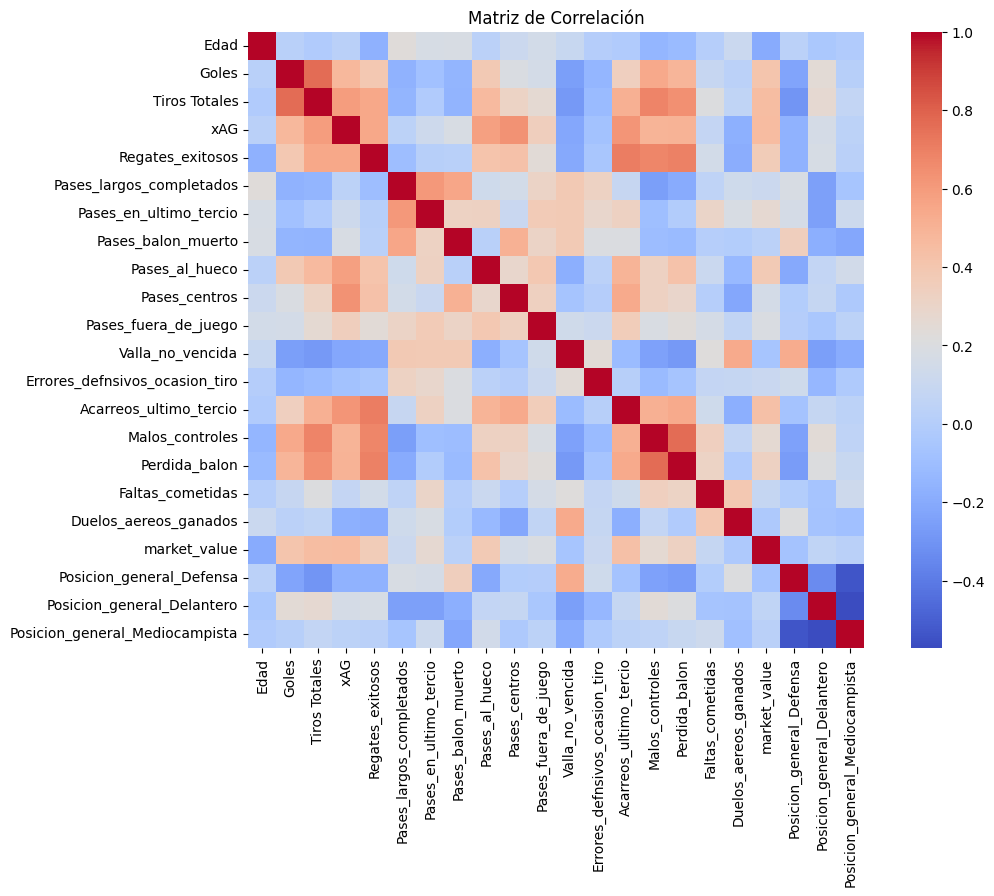

In [161]:
#Verificamos la solucion del problema de colinealidad

#Matrix de correlacion
matriz_correlacion = df_postColinealidad .corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()


In [162]:
# Encontrar parejas de variables con correlación mayor a 0.8
correlaciones_altas = []

# Recorrer la matriz de correlación
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        correlacion = abs(matriz_correlacion.iloc[i, j])
        
        if correlacion > 0.8:
            correlaciones_altas.append((var1, var2, correlacion))

# Ordenar por correlación descendente
correlaciones_altas.sort(key=lambda x: x[2], reverse=True)

# Imprimir las parejas
print("Parejas de variables con correlación > 0.8:")
print("-" * 60)
for var1, var2, corr in correlaciones_altas:
    print(f"{var1} - {var2}: {corr:.3f}")

Parejas de variables con correlación > 0.8:
------------------------------------------------------------


Revisamos el rendimiento del modelo despues de estas correcciones

X_train: (6497, 21) | X_test: (722, 21)
R2_train      4.593141e-01
R2_test       3.724426e-01
RMSE_train    1.744442e+14
RMSE_test     2.178570e+14
MAE_train     9.544959e+06
MAE_test      1.053658e+07
MAPE_train    2.465935e+02
MAPE_test     2.501077e+02
dtype: float64
R² = 0.459
Media de residuos: -0.000000 (debe ser ≈0)
Desviación estándar: 13,207,731.24
Residuo máximo: 73,918,269.02


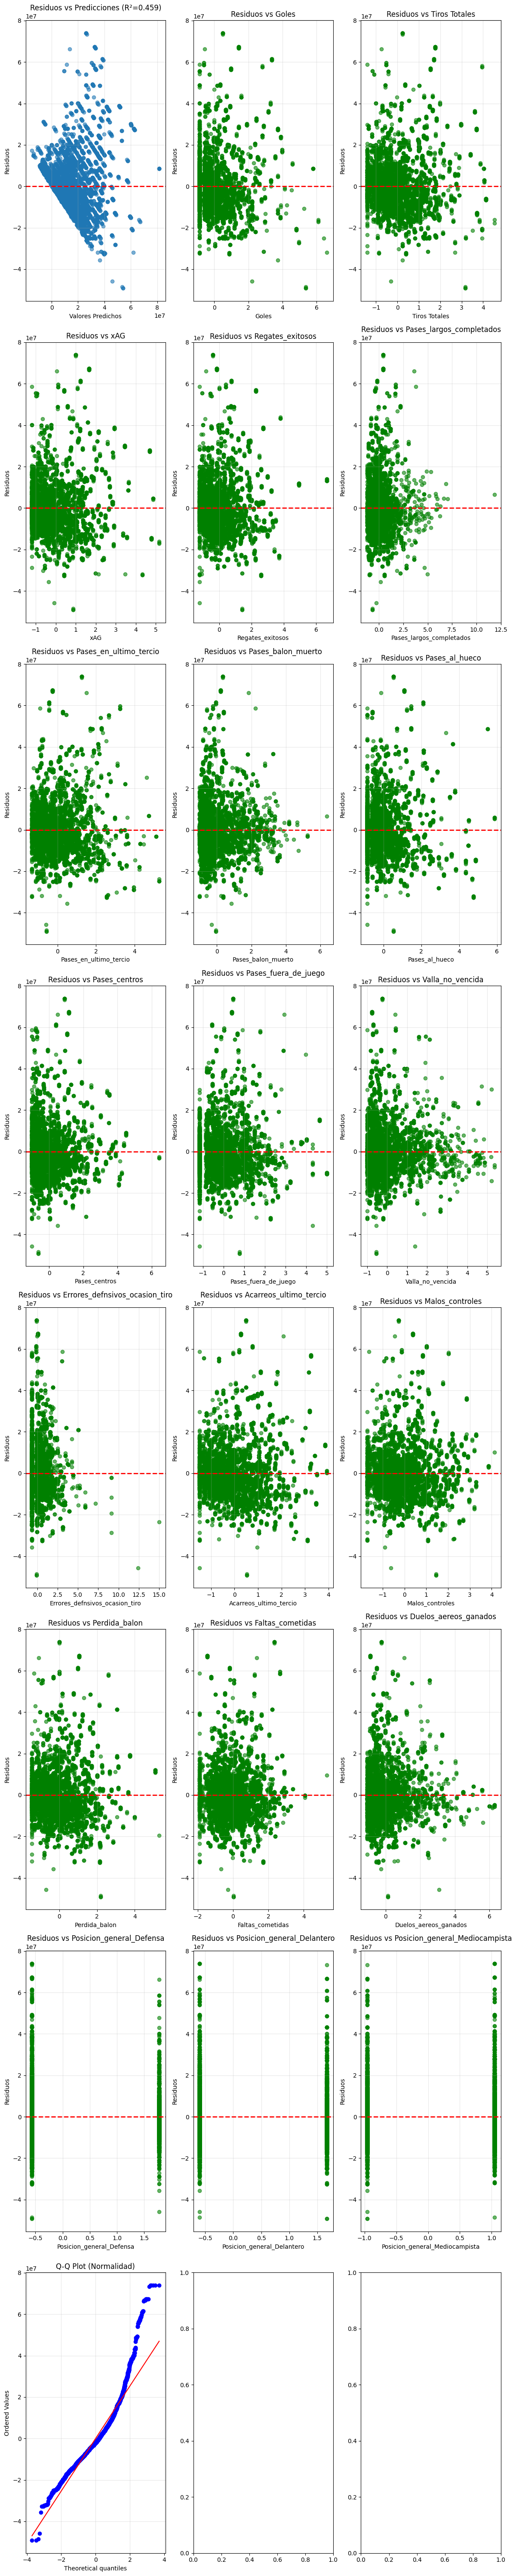

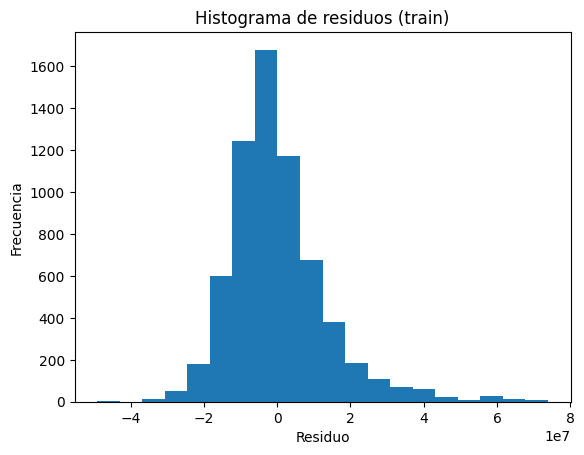

Posibles outliers por |residuo estandarizado|>3: 97
Indices de outliers:Index([3660, 1382, 5120,  437, 6126, 5793, 5789, 6312, 1126, 5790,  439, 1124,
       6314, 1384, 6912, 1385, 6231, 4568, 6124, 6125, 3071, 4008, 6315, 5119,
        440, 7100, 7019, 4567, 6233, 5786, 5788, 5785,  905, 5299,  903, 6129,
       1128, 7018, 6235, 4039, 6131, 6127, 5298, 6230, 5115, 7101, 7021, 6234,
       2390, 6316, 1129,  906,  431, 5784, 5792, 4650,  908, 7014, 4645, 5296,
       6130, 6313,  432, 4652, 6133, 7103, 4648,  436, 4570, 5368,  435, 3662,
       4009, 3657, 4646, 3661, 3659, 7020, 4040, 3658, 4651,  430, 7016, 1387,
       7017, 5116, 5117, 7104, 4010, 5783, 5297,  321,  438, 1123, 4041, 1383,
       5787],
      dtype='int64')


In [163]:
lasso,residuos,outliers,scaler=modelo_evaluacion(df_postColinealidad)

Pese a que ha disminuido el R2, al reducir la multicolinealidad, el modelo se vuelve más estable y sus coeficientes más interpretables ademas de que el cumplimiento de este supuesto ayuda a garantizar validez de la regresion.